# Aprendizaje Automático - Práctica 1 - Experimentación con clasificadores y regresores

#### Valoración máxima: 10 puntos

#### Fecha límite de entrega: 21 de Abril de 2024 a las 23:59

#### Entrega a través de https://pradogrado2324.ugr.es/

### Nombre completo: <mark>PABLO GÁLVEZ ORTIGOSA</mark>



---


**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero `.ipynb`) o, en su defecto, tres Notebooks de Colab (uno con cada ejercicio). No es necesario entregar ninguna memoria externa (por ejemplo, en `.pdf`).

- El código debe estar bien comentado (explicando lo que realizan los distintos apartados y/o bloques), y todas las decisiones tomadas y el trabajo desarrollado (incluyendo los conceptos fundamentales subyacentes) deben documentarse ampliamente en celdas de texto. Es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también tanto una descripción de las principales funciones (Python/scikit-learn) empleadas (para mostrar que el alumno comprende, a nivel técnico, lo que está haciendo), como una valoración razonada sobre la calidad de los resultados obtenidos. Sin esta documentación, se considera que el trabajo NO ha sido presentado.

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final.  

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El código NO puede escribir nada a disco.

- El path de lectura desde Google Drive debe ser siempre el mismo, que es el que se indica en este Notebook.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores. Es decir, un ejercicio con errores de ejecución tendrá una calificación de 0.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input()`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- Se entrega solamente este Notebook, y no los datos empleados.


---

## <font color='blue'>Ejercicio 1: EL PROBLEMA DEL SOBREAJUSTE (2 puntos)</font>

<font color='blue'>Aprendizaje Automático (AA) es la rama de la Inteligencia Artificial (IA) que se ocupa de diseñar e implementar máquinas que sean capaces de aprender a realizar una determinada tarea a partir de los propios datos (es decir, sin necesidad de ser programadas explícitamente para ello). El principal objetivo de los modelos de AA es realizar predicciones/estimaciones más allá de los conjuntos de datos con los que fueron entrenados y, como es lógico, se pretende que dichos modelos sean capaces de $generalizar$ más allá de los ejemplos vistos en entrenamiento. Como consecuencia, uno de los mayores obstáculos a los que nos enfrentamos se conoce como $sobreajuste$ ($overfitting$): el hecho de que nuestros pesos/parámetros estén demasiado apegados a nuestros ejemplos de entrenamiento, y se produzca una brecha a nivel de generalización (en donde los resultados en entrenamiento serían manifiestamente mejores que en test).

<font color='blue'>En este ejercicio intentaremos profundizar un poco en lo que es el sobreajuste, así como las causas y consecuencias del mismo.



---




<font color='blue'>Primero, importamos las librerías necesarias y fijamos la semilla aleatoria para que nuestros resultados sean reproducibles entre ejecuciones.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Fijamos la semilla aleatoria
np.random.seed(42) #¿Por qué 42? https://en.wikipedia.org/wiki/Phrases_from_The_Hitchhiker%27s_Guide_to_the_Galaxy

In [5]:
import sklearn
if sklearn.__version__ < '1.3':
  # Actualizamos scikit-learn para tener la última versión.
  # Nos interesa de cara a disponer de las más recientes funcionalidades
  # (como, por ejemplo, poder usar cross_validate() empleando el parámetros return_indices=True; https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)
  !pip install scikit-learn --upgrade
else:
  print('La versión de scikit-learn es: ', sklearn.__version__)


La versión de scikit-learn es:  1.4.2






---






### <font color='blue'>Ejercicio 1.A: Regresión en 1D (1 punto)</font>

<font color='blue'> En este ejercicio se intentará aproximar una función continua unidimensional por medio de regresión lineal (`LinearRegression()`), y se irá, progresivamente, incrementando la complejidad del modelo empleando características polinomiales (`PolynomialFeatures()`), de grados $\{1, 2, 4, 8, 16, 32\}$. La función real a aproximar (nuestra $\textit{ground truth}$) es: $f(x) = cos(1.5\cdot\pi\cdot x) + sin(0.5\cdot\pi\cdot x)$.

<font color='blue'> Las tareas a realizar en este ejercicio se resumen a continuación:
1.   *Completamos el código de la función real a aproximar.*
2.   *Generamos las entradas ($X$): 20 puntos aleatorios en el intervalo $[0,1]$.*
3.   *Generamos las salidas deseadas ($y$): el valor resultante de emplear la función real y sumarle un cierto error aleatorio (`np.random.randn`: distribución Normal estándar), que pretende simular el ruido que pueden contener las etiquetas ($labels$/$targets$) en cualquier problema.*
4.   Generamos las características polinomiales asociadas con los grados proporcionados, y creamos un $pipeline$ (usando `Pipeline` o `make_pipeline`) con dichas características y regresión lineal.
5.   Realizamos el ajuste (`fit`) de dicho `pipeline` con $X$ e $y$, y empleamos `cross_val_score`, o `cross_validate`, para evaluar el rendimiento utilizando $\textit{10-fold cross-validation}$ y el error cuadrático medio ($MSE$) como métrica de error.
6. Mostramos figuras con ajustes. Para ello, generamos 1000 valores equiespaciados en el intervalo $[0,1]$, y realizamos la predicción de nuestro modelo (`pipeline.predict`) sobre dichos datos para mostrar, en rojo, la función que aproxima nuestro modelo entrenado. En la misma figura incluiremos, en azul, la función real empleada para generar los datos, y los puntos/muestras generadas ($X$ e $y$). El título de cada figura debe incluir el grado del polinomio.
7. Junto con estas figuras, se debe mostrar una tabla (y aquí la librería `tabulate` puede ser de utilidad) que incluya, el grado del polinomio en la primera fila ($header$ de la tabla), el número de pesos/coeficientes en la segunda, el $MSE$ (promedio y desviación típica) obtenido en entrenamiento en validación cruzada en la tercera fila, el $MSE$ (promedio y desviación típica) obtenido en test en validación cruzada en la cuarta fila, y el valor medio de los coeficientes aprendidos en valor absoluto con cada uno de los 6 modelos ajustados (incluyendo el $bias$ o $intercept$) en la última.

<font color='blue'> El alumnado debe describir en detalle el trabajo realizado y las conclusiones extraídas: ¿se observa algún patrón en los resultados obtenidos, así como en la magnitud de los coeficientes tras el entrenamiento? ¿Se observa algún fenómeno de infraentrenamiento ($underfitting$) o sobreentrenamiento ($overfitting$)? ¿Qué grado considera el más adecuado para resolver este problema? ¿Por qué?

Definimos la función que queremos aproximar, y generamos los puntos (X e y), con cierto grado de ruido:

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import PolynomialFeatures

def funcionReal(X):
    return np.cos(1.5*np.pi*X) + np.sin(0.5*np.pi*X) # a cubrir por el alumnado

n_samples = 20
degrees = [1, 2, 4, 8, 16, 32]

X = np.random.rand(n_samples)
y = funcionReal(X) + np.random.randn(n_samples) * 0.1


Creamos un vector con los modelos de grado 1,2,4,8,16 y 32.

Para crear el modelo, creamos una *Pipeline*, de manera que se generan los coeficientes del correspondiente grado (*PolynomialFeatures*) y posteriormente se aplica regresión lineal (utilizando *LinearRegression*).

En *PolynomialFeatures* se pone *include_bias* a False, ya que *LinearRegression* incluye el término de *bias* por defecto.

Finalmente, ajustamos cada modelo a los datos, y medimos el error utilizando validación cruzada y utilizando la métrica del error medio cuadrático (SME).


In [7]:
regr = []
scores = []

# Creación del modelo (En Regresión Lineal no es necesario escalar!)
for deg in degrees:
  regr.append(make_pipeline(PolynomialFeatures(deg, include_bias=False),LinearRegression()))

# Entrenamiento y validación
for modelo in regr:
  modelo.fit(X.reshape(-1, 1),y)
  scores.append(cross_validate(modelo, X.reshape(-1, 1), y, scoring='neg_mean_squared_error', return_train_score=True))

Creamos una gráfica por cada modelo ajustado:

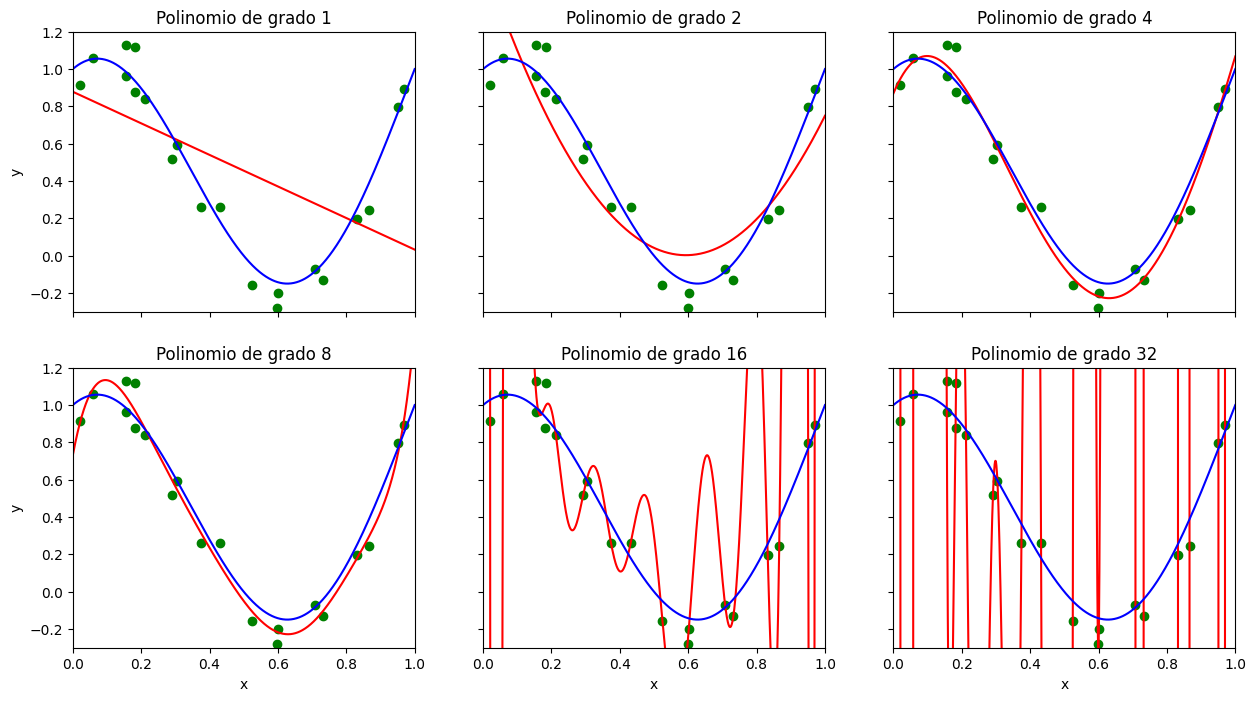

In [8]:
# 2 filas, cada una con la mitad de gráficas a representar
num_plots = int(len(degrees)/2)
f, axs = plt.subplots(2, num_plots, figsize=(15, 8))

aux = 0

# Generamos 1000 puntos equidistribuidos entre 0 y 1
values_x = np.linspace(0, 1, 1000)

# Representación gráfica
for modelo in regr:

  # Predecimos los valores
  predictions_y = modelo.predict(values_x.reshape(-1, 1))

  # RED: Función aproximada por modelo, BLUE: Función a aproximar, GREEN: Muestras generadas
  axs[aux//num_plots, aux%num_plots].plot(values_x, predictions_y, 'r')
  axs[aux//num_plots, aux%num_plots].plot(values_x, funcionReal(values_x), 'b')
  axs[aux//num_plots, aux%num_plots].scatter(X, y, c='g')
  axs[aux//num_plots, aux%num_plots].set_title(f"Polinomio de grado {degrees[aux]}")
  aux += 1

# Elegimos mismos rangos de x e y para todas las gráficas
for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')
    ax.set_ylim([-0.3, 1.2])
    ax.set_xlim([0.0, 1.0])

# Mostramos solo los ejes en las gráficas de los extremos
for ax in axs.flat:
    ax.label_outer()

Mostramos las tablas pedidas:

In [9]:
from tabulate import tabulate

# Creamos una tabla
tabla = []
aux = 0

# Por cada modelo ajustado:
for modelo in regr:

  fila = []

  # Grados del polinomio
  fila.append(degrees[aux])

  # Número de coeficientes = coeficientes de PolynomialFeatures + 1 (intercept)
  fila.append(len(modelo[1].coef_)+1)

  # Media y desviación de MSE en train
  fila.append(abs(np.average(scores[aux]["train_score"])))
  fila.append(np.std(scores[aux]["train_score"]))

  # Media y desviación de MSE en test
  fila.append(abs(np.average(scores[aux]["test_score"])))
  fila.append(np.std(scores[aux]["test_score"]))

  # Media de los coeficientes
  coefs = np.append(abs(modelo[1].coef_), abs(modelo[1].intercept_))
  fila.append(np.average(coefs))

  aux += 1

  tabla.append(fila)

print(tabulate(tabla,
               headers=['Grado', 'Núm. coeficientes', 'Media MSE (training)', 'STD MSE (training)', 'Media MSE (test)', 'STD MSE (test)', 'Media de coeficientes'],
               tablefmt='fancy_grid',
               numalign='right'))



╒═════════╤═════════════════════╤════════════════════════╤══════════════════════╤════════════════════╤══════════════════╤═════════════════════════╕
│   Grado │   Núm. coeficientes │   Media MSE (training) │   STD MSE (training) │   Media MSE (test) │   STD MSE (test) │   Media de coeficientes │
╞═════════╪═════════════════════╪════════════════════════╪══════════════════════╪════════════════════╪══════════════════╪═════════════════════════╡
│       1 │                   2 │                0.15748 │            0.0262616 │           0.198503 │        0.0988052 │                0.862087 │
├─────────┼─────────────────────┼────────────────────────┼──────────────────────┼────────────────────┼──────────────────┼─────────────────────────┤
│       2 │                   3 │              0.0500292 │           0.00981346 │          0.0799408 │        0.0529379 │                 3.81791 │
├─────────┼─────────────────────┼────────────────────────┼──────────────────────┼────────────────────┼──────────

Analicemos los resultados obtenidos:
- Se observa *underfitting* tanto en el polinomio de grado 1 como en el de grado 2. El error que se obtienen en ambos en el entrenamiento sigue siendo elevado, y como resultado, en el test se obtiene un error parecido.
- Tanto el polinomio de grado 4 como el de 8 obtienen bastantes buenos resultados, siendo el error en entrenamiento muy reducido, pero generalizando perfectamente al conjunto de test, donde el error es también muy reducido.
- Es el polinomio de grado 4 el que obtiene los mejores resultados, tanto de forma visual en las gráficas, como en las tablas, donde se comprueba que es el modelo que obtiene el menor error en el test. Sería, por tanto, el mejor grado para resolver el problema.
- Se observa *overfitting* en los polinomios de grado 16 y 32. Ambos obtienen coeficientes con un valor muy elevado, lo que les permite ajustar perfectamente los puntos generados. Como resultado, el error en el entrenamiento es prácticamente 0, pero generaliza muy mal al conjunto de test, donde los errores observados son enormes.

### <font color='blue'>Ejercicio 1.B: Clasificación en 2D (1 punto)</font>

<font color='blue'> En este ejercicio haremos algo similar a lo realizado en el anterior, pero ahora con un problema de clasificación y empleando un problema sintético en 2D. Haremos uso de dos funciones, que se incluyen a continuación:

<font color='blue'>$simula\_unif(N, dim, rango)$, que calcula una lista de $N$ vectores de dimensión $dim$. Cada vector contiene $dim$ números aleatorios uniformes en el intervalo $rango$.

<font color='blue'>$simula\_recta(intervalo)$, que simula de forma aleatoria los parámetros $v = (a, b)$ de una
recta, $y = ax + b$, dado un determinado intervalo (dentro del cual se generan dos puntos aleatorios, que se emplearán para calcular la pendiente y el término independiente de la recta).

In [10]:
np.random.seed(42)

In [11]:
def simula_unif(N, dim, rango):
	return np.random.uniform(rango[0],rango[1],(N,dim))

In [12]:
def simula_recta(intervalo):
    points = np.random.uniform(intervalo[0], intervalo[1], size=(2, 2))
    x1 = points[0,0]
    x2 = points[1,0]
    y1 = points[0,1]
    y2 = points[1,1]
    # y = a*x + b
    a = (y2-y1)/(x2-x1) # Cálculo de la pendiente.
    b = y1 - a*x1       # Cálculo del termino independiente.

    return a, b



<font color='blue'>Ahora, con ayuda de la función $simula\_unif()$, vamos a generar una muestra de 100 puntos 2D, en el intervalo $[-50, 50]$,  a los que vamos a añadir una etiqueta usando el signo de la función $f(x, y) = y - ax - b$ (es decir, el signo de la distancia de cada punto a la recta simulada con
$simula\_recta()$).




In [13]:
"""
np.sign(0) da 0 (véase https://numpy.org/doc/stable/reference/generated/numpy.sign.html), lo que, en ciertas ocasiones, puede ser problemático
Por ese motivo, proporcionamos esta sencilla función que devuelve el signo del valor que se le proporciona como entrada
Si esta función se emplea con un array, se obtendrá el error "ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()"
Si quiere emplearse con arrays, bastaría vectorizarla:
		numeros = np.random.randint(-10,10,10)
		sgn = np.vectorize(signo)
		print(numeros)
		print(sgn(numeros))
"""
def signo(x):
	if x >= 0:
		return 1
	return -1

def f(x, y, a, b):
	return signo(y - a*x - b)

In [14]:
intervalo = [-50,50]
[a, b] = simula_recta(intervalo)
new_points = simula_unif(100, 2, [-50,50])

y = []
for i in range(0,new_points.shape[0]):
    y.append(f(new_points[i][0], new_points[i][1], a, b))

y = np.array(y, np.float64)

<font color='blue'>A continuación, calculamos el error de clasificación de dicha recta ideal, y visualizamos el ajuste obtenido. Como es lógico, el error es 0% dado que lo único que estamos haciendo es mostrar los puntos etiquedatos con la recta que acabamos de crear.

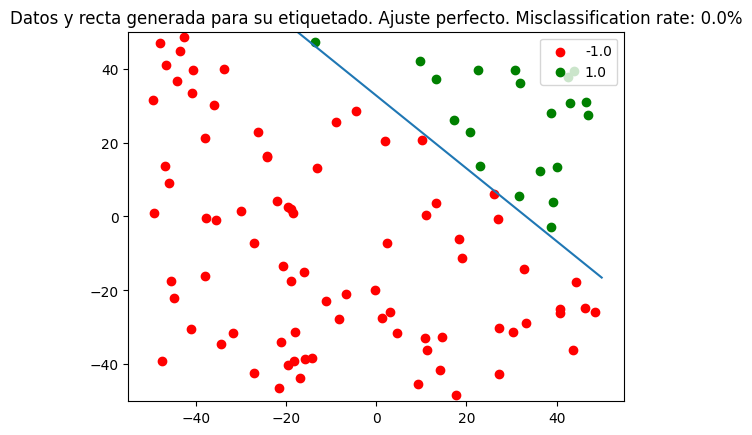

In [15]:
errors = []
for i in range(0,new_points.shape[0]):
    errors.append(f(new_points[i,0], new_points[i,1], a, b) != y[i])
MC_rate = 100*np.sum(errors)/new_points.shape[0]

# Dibujamos una gráfica donde los puntos muestren el resultado de su etiqueta, junto con la recta usada para ello
clases = np.unique(y)
X_class = [new_points[y==c_i] for c_i in clases]
colors=['red','green']
for i in range(len(clases)):
    plt.scatter(X_class[i][:, 0], X_class[i][:, 1], color=colors[i], label = clases[i])

# plt.scatter(new_points[:,0],new_points[:,1], c=y)
plt.legend(loc='upper right')
plt.plot([intervalo[0], intervalo[1]], [a*(intervalo[0])+b, a*(intervalo[1])+b])
plt.ylim((intervalo[0], intervalo[1]))
plt.title('Datos y recta generada para su etiquetado. Ajuste perfecto. Misclassification rate: {}%'.format(MC_rate))
plt.show()

<font color='blue'>Vamos a modificar de forma aleatoria un 5\% de las etiquetas positivas y otro 5\% de las negativas. Esta modificación de etiquetas está asociada con el ruido que siempre puede estar presenta en las etiquetas (sea por problemas en la transmisión de los datos, la precisión de los sistemas de medición, la incertidumbre ligada al proceso de adquisición y anotación de los datos, etc.) En esta ocasión, a pesar de que la recta empleada es la recta ideal (es decir, la propia función empleada para generar nuestra muestra original), habrá un cierto porcentaje de error asociado.  </font>

In [16]:
def introducir_ruido(y,porcent_ruido):
  # Identificamos las clases a partir de las etiquetas
  classes = np.unique(y)
  # Creamos una copia de las etiquetas, que será el array ruidoso que produciremos como salida
  y_noise = y.copy()
  # Ahora vamos recorriendo cada una de las clases
  for i in range(len(classes)):
    # Calculamos el número de ejemplos por clase a modificar
    numberPerClass = int(np.round(np.sum(y==classes[i])*porcent_ruido/100))
    # Recuperamos los índices de los ejemplos de cada clase y los desordenamos
    clase = np.where(y == classes[i])
    clase = np.random.permutation(clase[0])
    # Alteramos (introducimos ruido en) los índices correspondientes
    for i in clase[:numberPerClass]:
      y_noise[i] = y[i]*-1

  return y_noise

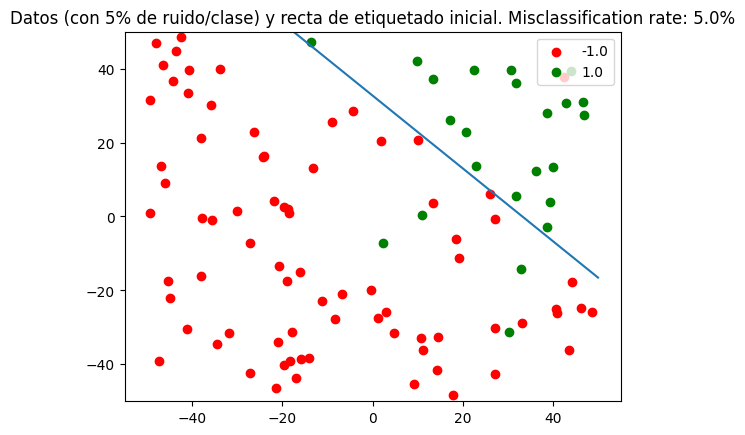

In [17]:
# Dibujar una gráfica donde los puntos muestren el resultado de su etiqueta,
# junto con la recta usada para ello
# Array con 10% de indices aleatorios para introducir ruido

porcentaje_ruido = 5
y_noise = introducir_ruido(y,porcentaje_ruido)

errors = []
for i in range(0,new_points.shape[0]):
    errors.append(f(new_points[i,0], new_points[i,1], a, b) != y_noise[i])
MC_rate = 100*np.sum(errors)/new_points.shape[0]

plt.figure()

clases = np.unique(y_noise)
X_class = [new_points[y_noise==c_i] for c_i in clases]
colors=['red','green']
for i in range(len(clases)):
    plt.scatter(X_class[i][:, 0], X_class[i][:, 1], color=colors[i], label = clases[i])

plt.legend(loc='upper right')
# plt.scatter(new_points[:,0],new_points[:,1], c=y_noise)
plt.plot([intervalo[0], intervalo[1]], [a*(intervalo[0])+b, a*(intervalo[1])+b])
plt.ylim((intervalo[0], intervalo[1]))
plt.title('Datos (con {}% de ruido/clase) y recta de etiquetado inicial. Misclassification rate: {}%'.format(porcentaje_ruido,MC_rate))
plt.show()



<font color='blue'>Ahora queremos entrenar un $\textit{Support Vector Machine}$
 (`sklearn.svm.SVC` con kernel lineal) con estos datos y mostrar $accuracy$ y $f1$-$score$, tanto en entrenamiento como test, así como las fronteras de decisión encontradas. Una frontera de decisión ($\textit{decision boundary}$) es la superficie/hiperplano que separa el espacio de entradas de modo que, en el contexto de un problema de clasificación binaria como el que nos ocupa, el clasificador etiquete todos los puntos de un lado de la frontera como pertenecientes a una clase y todos los del otro lado como pertenecientes a la otra.

 <font color='blue'>Vamos a repetir la operación anterior con distintas transformaciones (polinómicas) de los datos de entrada (grados $1, 2, 4$ y $8$). Queremos explorar cómo cambian estas fronteras de decisión a medida que incrementamos la complejidad de los modelos empleados.

 <font color='blue'> Más concretamente, tenemos que mostrar los siguientes resultados:
* <font color='blue'>Fronteras de decisión 2D sobre datos de entrenamiento para cada uno de los 4 ajustes (e incluyendo una línea que represente la frontera ideal, es decir, la correspondiente con la recta generadora de las etiquetas y que nos gustaría aproximar). Para esta visualización pueden resultar de utilidad las siguientes funciones: `contourf`, `ListedColormap` o `DecisionBoundaryDisplay`; y el siguiente script: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html.
* <font color='blue'>Una tabla que incluya el grado de polinomio empleado (en la primera fila), el número de pesos ajustados (en la segunda fila), y los errores de entrenamiento y test con cada uno de los modelos ajustados ($accuracy$ y $f1$-$score$), en las filas tercera y cuarta de la tabla, respectivamente. De cara a evaluar el error de test, en este caso crearemos un conjunto de test diferenciado (con 100 ejemplos) siguiendo exactamente el mismo proceso empleado para el conjunto de entrenamiento. Este error de test se utilizará como estimación del error fuera de la muestra (lo que se conoce como $\textit{out-of-sample error}$).

<font color='blue'>Desde el punto de vista de entrenamiento del modelo, se recomienda emplear $SVC$ atendiendo a los siguientes aspectos: es importante escalar los datos antes de entrenar (`StandardScaler`); *no nos interesa emplear regularización a la hora de entrenar el modelo* (¿por qué?), motivo por el cual tendremos que escoger un valor elevado para el hiperparámetro $C$; tendremos que escoger un valor de iteraciones suficientemente alto como para permitir que el modelo entrene adecuadamente, pero suficientemente bajo como para que el entrenamiento no se eternice; y, finalmente, recordemos que el kernel a emplear es linear (¿cuál emplea SVC por defecto?).

<font color='blue'>El alumnado debe describir en detalle el trabajo realizado, las decisiones tomadas, así como las conclusiones extraídas a partir de los resultados obtenidos.

Creamos, para cada grado, el modelo que vamos a utilizar, primero aplicamos *PolynomialFeatures* para generar los coeficientes de cada grado, después utilizamos *StandardScaler* para realizar un escalado, y posteriormente utilizamos *SVC* eligiendo **kernel lineal**.

Ponemos *include_bias=False* en PolynomialFeatures, ya que, de nuevo, StandarScaler incluye el bias por defecto.

Por defecto, *SVC* utiliza el kernel gaussiano (rbf), por lo que debemos especificar el valor "linear".

Nos interesa comprobar cómo sobreajusta el modelo, por lo que no utilizaremos regularización. Utilizaremos un valor de C muy elevado, para que el modelo intente ajustarse perfectamente a los datos de entrada.



In [18]:
# a cubrir por el alumnado
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

degrees = [1,2,4,8]
svm = []

aux = 0

# Creación del modelo
for degree in degrees:
  svm.append(make_pipeline(PolynomialFeatures(degree=degrees[aux], include_bias=False),StandardScaler(),SVC(kernel="linear",C=100000, max_iter=10000000)))
  aux += 1

Generamos los puntos de test:

In [19]:
# Generamos 100 puntos de test --> proceso análogo a la creación de las muestras
x_test = simula_unif(100, 2, intervalo)

y_test = []
for i in range(0,x_test.shape[0]):
    y_test.append(f(x_test[i][0], x_test[i][1], a, b))

y_test = np.array(y_test, np.float64)

porcentaje_ruido = 5
y_test = introducir_ruido(y_test,porcentaje_ruido)

Realizaremos una gráfica que muestre las fronteras de decisión de cada modelo.

Utilizaremos para ello la función de ScikitLearn **DecisionBoundaryDisplay**, con el parámetro *response_method="predict"*.

Representaremos de un color más claro los puntos de test y de un color más oscuro las muestras con las que se ha entrenado el modelo:

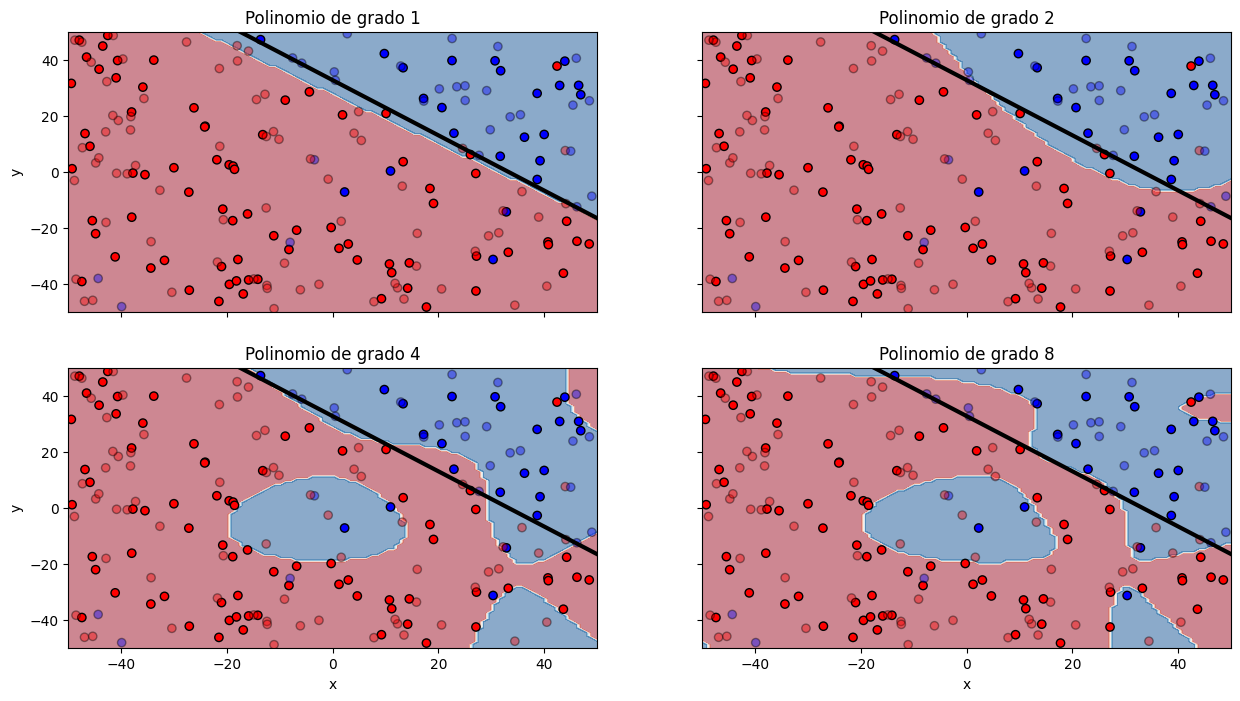

In [20]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap

# Mapa de color: ROJO y AZUL
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

# 2 filas con 2 gráficas cada una
num_plots = int(len(degrees)/2)
f, axs = plt.subplots(2, num_plots, figsize=(15, 8))

aux = 1

# Creamos un vector que tenga todos los datos para la representación
X = np.concatenate((new_points, x_test), axis=0)

for modelo in svm:

  ax = plt.subplot(2, num_plots, aux)

  # Entrenamos al modelo con los puntos generados
  modelo.fit(new_points, y_noise)

  # Representamos la frontera de decisión con el mapa de color anterior
  DecisionBoundaryDisplay.from_estimator(
    modelo,
    X,
    response_method="predict",
    ax = ax,
    cmap=plt.cm.RdBu,
    alpha=0.5
  )

  # Representamos los puntos de entrenamiento
  ax.scatter(new_points[:,0], new_points[:,1], c=y_noise, cmap=cm_bright, edgecolors="k")

  # Representamos los puntos de test (de un color más claro)
  ax.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap = cm_bright, edgecolors="k", alpha = 0.4 )

  # Representamos la frontera ideal de color negro y que queremos aproximar
  ax.plot([intervalo[0], intervalo[1]], [a*(intervalo[0])+b, a*(intervalo[1])+b], c="black", linewidth=3.0)

  ax.set_title(f"Polinomio de grado {degrees[aux-1]}")
  aux += 1

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')
    ax.set_ylim([-50, 50])
    ax.set_xlim([-50, 50])

for ax in axs.flat:
    ax.label_outer()

Calculamos la precisión ($accuracy$) y el $\textit{f1-score}$.

Utilizamos el $\textit{f1-score}$, ya que, como sabemos, únicamente con la precisión no podemos evaluar correctamente un clasificador.

In [21]:
from sklearn.metrics import accuracy_score, f1_score

scores_training = []
scores_test = []

for modelo in svm:
  scores = []

  # Predicción de los puntos de training
  y_pred = modelo.predict(new_points)

  # Calculamos accuracy y f1_score
  scores.append(accuracy_score(y_noise, y_pred))
  scores.append(f1_score(y_noise, y_pred))

  scores_training.append(scores)

  scores = []

  # Predicción de los puntos de test
  y_pred = modelo.predict(x_test)

  # Calculamos accuracy y f1_score
  scores.append(accuracy_score(y_test, y_pred))
  scores.append(f1_score(y_test, y_pred))

  scores_test.append(scores)

Representamos los resultados en una tabla:

In [22]:
from tabulate import tabulate

tabla = []
aux = 0

for modelo in svm:
  fila = []
  fila.append(degrees[aux])
  fila.append(len(modelo[2].coef_[0])+1)

  # Añadimos puntuaciones en entrenamiento
  fila.append(scores_training[aux][0])
  fila.append(scores_training[aux][1])

  # Añadimos puntuaciones en test
  fila.append(scores_test[aux][0])
  fila.append(scores_test[aux][1])

  aux += 1

  tabla.append(fila)

print(tabulate(tabla,
               headers=['Grado', 'Núm. coeficientes', 'Accuracy (training)', 'F1-score (training)', 'Accuracy (test)', 'F1-score (test)'],
               tablefmt='fancy_grid',
               numalign='right'))

╒═════════╤═════════════════════╤═══════════════════════╤═══════════════════════╤═══════════════════╤═══════════════════╕
│   Grado │   Núm. coeficientes │   Accuracy (training) │   F1-score (training) │   Accuracy (test) │   F1-score (test) │
╞═════════╪═════════════════════╪═══════════════════════╪═══════════════════════╪═══════════════════╪═══════════════════╡
│       1 │                   3 │                  0.93 │              0.844444 │              0.91 │          0.842105 │
├─────────┼─────────────────────┼───────────────────────┼───────────────────────┼───────────────────┼───────────────────┤
│       2 │                   6 │                  0.91 │                   0.8 │              0.89 │           0.77551 │
├─────────┼─────────────────────┼───────────────────────┼───────────────────────┼───────────────────┼───────────────────┤
│       4 │                  15 │                  0.97 │              0.933333 │              0.83 │          0.730159 │
├─────────┼─────────────

En primer lugar, el número de coeficientes ajustados cambia de esa forma, ya que, a diferencia del apartado anterior, cada entrada tiene dos valores $(x_1,x_2)$, de manera que, por ejemplo, el modelo de grado 1 consistiría en ajustar los pesos $\textbf{w} = (w_1,\dots, w_n)$:

> $w_1x_1 + w_2x_2 + w_3$

y el de grado 2 en ajustar:

> $w_1x_1 + w_2x_2 + w_3x_1^2 + w_4x_2^2 + w_5 x_1x_2 + w_6$

y así en general.



En cuanto a los resultados, ocurre lo que esperábamos:
- El modelo de grado 1 predice prácticamente la recta que buscábamos, y es por tanto, el que obtiene los mejores resultados, tanto en precisión como en el $\textit{f1-score}$.
- A medida que aumentamos el grado, se observa un mayor sobreaprendizaje. El modelo se ajusta cada vez más a los datos de entrenamiento (en el de grado 8, el clasificador llega a ser perfecto en el entrenamiento), pero en el test tiene cada vez peores resultados.



---



## <font color='blue'>Ejercicio 2: PROBLEMA DE CLASIFICACIÓN (4 puntos) </font>

<font color='blue'> En este ejercicio los alumnos se enfrentarán a un problema de clasificación, que tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). Más concretamente, se enfrentarán al problema de $\textit{Optical Recognition of Handwritten Digits}$ (https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits). Este conjunto de datos contiene información sobre distintos dígitos manuscritos: cada fila contiene 64 valores enteros (en el rango $[0, 16]$) y un valor entero
(que se encuentra en el rango $[0, 9]$) que se corresponde con el dígito manuscrito a clasificar. En total hay 64 características/$features$ y 5620 ejemplos/instancias. El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):
1. <font color='blue'> Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de, al menos, 3 modelos de aprendizaje automático a emplear en la resolución del problema, de los cuales 1 por lo menos debe ser un $ensemble$.
5. Selección y estimación de valores para hiperparámetros (incluyendo el tipo de regularización a usar).
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.





In [23]:
#Para acceder a nuestros ficheros de Google Drive
from google.colab import drive
drive.mount('/content/drive')
# La carpeta 'clasificacion' (que contiene optdigits.tes, optdigits.tra, optdigits.names)
# debe estar en vuestro Drive, dentro de la carpeta 'Colab Notebooks'

Mounted at /content/drive


In [24]:
dataFolder = 'drive/MyDrive/Colab Notebooks/clasificacion/'

In [25]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

### 1: Análisis de los datos

Primeramente, debemos entender los datos que tenemos: se ha dividido una matriz de 32x32 en 8 bloques iguales (cada uno de 4x4). En cada bloque se ha contabilizado el número de casillas de color negro, obteniendo así 64 valores entre 0 y 16, que son los datos que nos han dado a nosotros.

Una imagen que ilustra lo anterior sería la siguiente:

![aa](https://drive.google.com/uc?export=view&id=1kxm-aVNoVd2jdVdRtjngwJMGDg9qqvTX)

Finalmente, el último valor, entre 0 y 9, indica el número representado a mano en dicha matriz.


Tenemos la siguiente información de los datos:
- No existen valores perdidos
- Los datos están dividos en entrenamiento (*optdigits.tra*) y test (*optdigits.tes*).


Echemos un vistazo a los datos (de entrenamiento) que tenemos:

In [26]:
import pandas as pd
pd.set_option('display.max_columns', None)

# Lectura del fichero de entrenamiento

numFeatures = 64
numNumbers  = 10

csv_path = dataFolder + "optdigits.tra"
dataset_train = pd.read_csv(csv_path, header=None)

dataset_train = dataset_train.rename(columns={numFeatures:'Número'})

dataset_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,Número
0,0,1,6,15,12,1,0,0,0,7,16,6,6,10,0,0,0,8,16,2,0,11,2,0,0,5,16,3,0,5,7,0,0,7,13,3,0,8,7,0,0,4,12,0,1,13,5,0,0,0,14,9,15,9,0,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,16,8,16,5,0,0,0,11,16,0,6,14,3,0,0,12,12,0,0,11,11,0,0,12,12,0,0,8,12,0,0,7,15,1,0,13,11,0,0,0,16,8,10,15,3,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,11,9,11,16,1,0,0,0,0,0,7,14,0,0,0,0,3,4,14,12,2,0,0,1,16,16,16,16,10,0,0,2,12,16,10,0,0,0,0,0,2,16,4,0,0,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,5,16,11,13,7,0,0,3,15,8,1,15,6,0,0,11,16,16,16,16,10,0,0,1,4,4,13,10,2,0,0,0,0,0,15,4,0,0,0,0,0,3,16,0,0,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,13,8,0,0,0,0,0,3,14,4,0,0,0,0,0,6,16,14,9,2,0,0,0,4,16,3,4,11,2,0,0,0,14,3,0,4,11,0,0,0,10,8,4,11,12,0,0,0,4,12,14,7,0,0,6


Veamos primero, por ejemplo, cuántos ejemplos hay de cada clase:

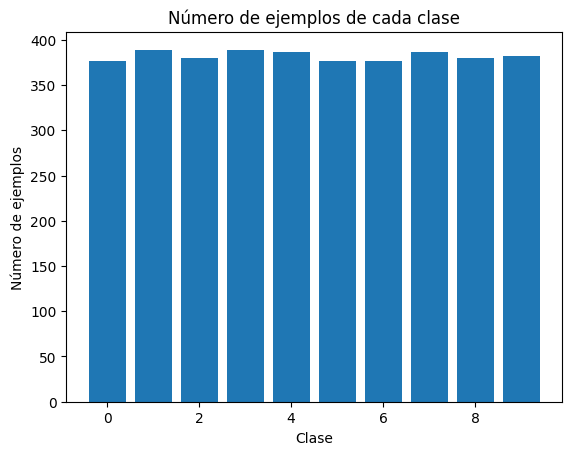

In [27]:
numExamples = np.zeros(numNumbers)

for i in range(numNumbers):
  numExamples[i] = (len(dataset_train[dataset_train.Número == i]))

plt.xlabel("Clase")
plt.ylabel("Número de ejemplos")
plt.title("Número de ejemplos de cada clase")

plt.bar(range(numNumbers), numExamples)
plt.show()

Comprobamos que prácticamente existe el mismo número de ejemplos de cada clase. Esto nos beneficia bastante, ya que nuestro clasificador no tenderá a clasificar los ejemplos por una clase en concreto o similar.

Hagamos ahora un resumen de la tabla de datos anterior:

In [28]:
dataset_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,Número
count,3823.0,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.0,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000
mean,0.0,0.301334,5.481821,11.805912,11.451478,5.505362,1.387392,0.142297,0.002093,1.960502,10.577295,11.715407,10.624902,8.295579,2.200105,0.151975,0.004970,2.595867,9.580696,6.735025,7.186503,8.048391,2.046037,0.049176,0.001046,2.335600,9.239079,9.133665,9.673293,7.867643,2.340309,0.003139,0.001308,2.042898,7.659430,9.238033,10.347633,9.200105,2.912634,0.0,0.027465,1.405702,6.456709,7.187287,7.921528,8.674863,3.510332,0.019880,0.017787,0.820037,7.868951,9.885692,9.764844,9.283285,3.743918,0.148313,0.000262,0.283024,5.855872,11.942977,11.461156,6.700497,2.105676,0.202197,4.497253
std,0.0,0.866986,4.631601,4.259811,4.537556,5.613060,3.371444,1.051598,0.088572,3.052353,5.435481,4.012160,4.788136,5.935551,4.062178,0.988778,0.119857,3.454065,5.886126,5.918303,6.142687,6.291498,3.581740,0.435462,0.032334,3.085915,6.128091,5.902591,6.282903,6.002377,3.624740,0.064625,0.036146,3.211658,6.259573,6.190196,5.920125,5.879345,3.486267,0.0,0.316193,2.934206,6.505373,6.469061,6.316368,5.805924,4.369131,0.213668,0.269110,2.009018,5.666636,5.141561,5.314977,5.940887,4.901657,0.767761,0.016173,0.928046,4.980012,4.334508,4.991934,5.775815,4.028266,1.150694,2.869831
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,9.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,5.000000,4.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,6.000000,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,5.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,13.000000,13.000000,12.000000,9.000000,0.000000,0.000000,0.000000,1.000000,11.000000,5.000000,6.000000,9.000000,0.000000,0.000000,0.000000,0.000000,11.000000,10.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,8.000000,11.000000,12.000000,11.000000,1.000000,0.0,0.000000,0.000000,4.000000,7.000000,8.000000,10.000000,1.000000,0.000000,0.000000,0.000000,8.000000,10.000000,10.000000,11.000000,1.000000,0.000000,0.000000,0.000000,5.000000,13.000000,13.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,10.000000,0.000000,0.000000,0.000000,3.000000,15.000000,15.00000

Lo más interesante de lo anterior es que hay varias zonas en las que nunca se escribe, como la 0, o la 39. De hecho, parece interesante comprobar en qué zonas se escribe más y en cuáles menos.

Para ello, calculamos la media en cada zona, y la representamos en una cuadrícula, las zonas menos coloreadas se pintarán de un color cercano al blanco, mientras que las más coloreadas se pintarán de un color cercano al negro.

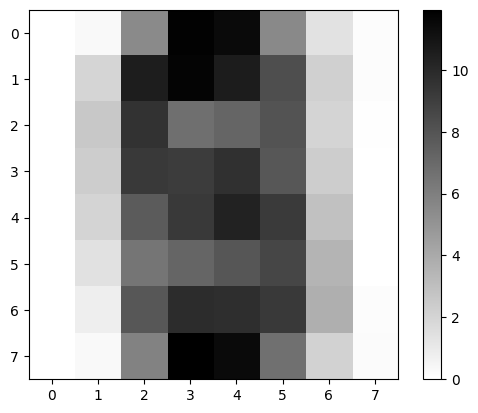

In [29]:
# Código tomado de:
# https://stackoverflow.com/questions/7229971/2d-grid-data-visualization-in-python

import matplotlib as mpl
from matplotlib import pyplot
import numpy as np

vals = dataset_train.mean()
numRows = int(np.sqrt(numFeatures))


X = []
row = []

# Representamos los datos en forma de matriz de 8 filas y 8 columnas
for i in range(numRows):
  for j in range(numRows):
    row.append(vals[j + i*numRows])
  X.append(row)
  row = []

fig = pyplot.figure(2)
ax = pyplot.gca()
ax.set_ylim(numRows-1+0.5,0-0.5)

# Creamos un mapa de color con el blanco, el gris y el negro
cmap2 = mpl.colors.LinearSegmentedColormap.from_list('my_colormap',
                                           ['white','grey','black'],
                                           256)

# Mapa de calor con el mapa de color anterior
img2 = pyplot.imshow(X,interpolation='nearest',
                    cmap = cmap2,
                    origin='lower')
pyplot.colorbar(img2,cmap=cmap2)

pyplot.show()

Observamos algo muy interesante: prácticamente todos los números se escriben entre las columnas 2 y 5 (y ligeramente entre la 1 y la 6), pero tanto la primera como la última columna son ignoradas por completo, y prácticamente siempre son 0.

Por último, es interesante como luce el gráfico anterior, cuando solo nos centramos en un dígito:

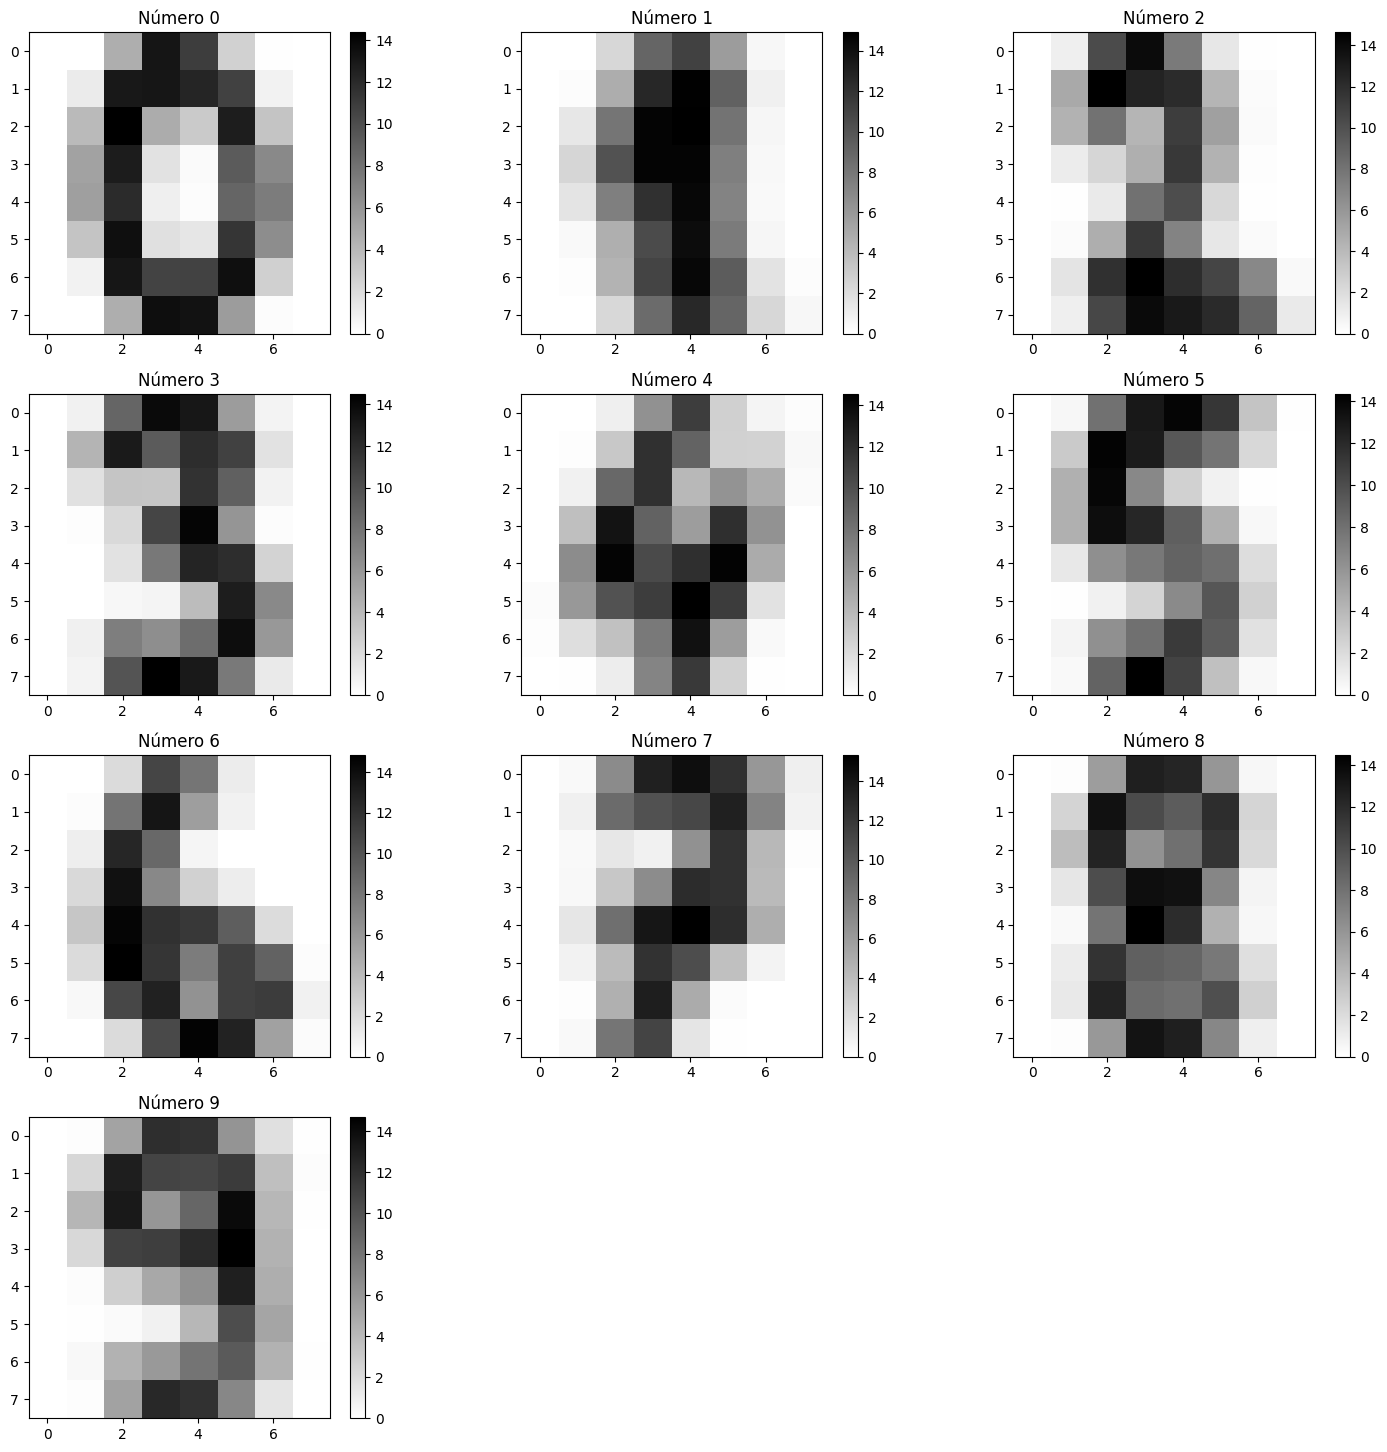

In [30]:
import matplotlib.pyplot as plt

cmap2 = mpl.colors.LinearSegmentedColormap.from_list('my_colormap',
                                           ['white','grey','black'],
                                           256)

fig = plt.figure(figsize=(18, 18))

# Para cada número
for k in range(numNumbers):

  vals = dataset_train[dataset_train['Número'] == k].mean()
  numRows = int(np.sqrt(numFeatures))

  X = []
  row = []

  # Representamos los datos en forma de matriz de 8 filas y 8 columnas
  for i in range(numRows):
    for j in range(numRows):
      row.append(vals[j + i*numRows])
    X.append(row)
    row = []

  # Gráfica de cada número
  ax = plt.subplot(4, 3, k+1)
  ax.set_title(f"Número {k}")

  img2 = ax.imshow(X,interpolation='nearest',
                      cmap = cmap2,
                      origin='lower')
  plt.colorbar(img2,cmap=cmap2)

  ax.set_ylim(numRows-1+0.5,0-0.5)


Podemos advertir que, hay ciertos números, como el 4, el 7 o el 1, en los que es muy complicado reconocer el número. Esto se debe a la gran variedad de formas de escribir estos números. Posiblemente, sean los dígitos en los que podremos tener un mayor error.

### 2: Preprocesado de datos

En general, estos datos no requieren de un gran preprocesado.

En primer lugar, no nos falta ningún dato, es decir tenemos siempre 64 datos en cada fila.

Además, tenemos datos definidos en dominios muy reducidos, ya que cada dato solo puede tener un valor entre 0 y 16.

En cuanto a la reducción de características, vamos a eliminar de los datos, tanto la columna 0, como la columna 7 (de la matriz), por lo visto en el anterior punto.

In [31]:
col07 = []

for i in range(numFeatures):
  if (i%8 == 0 or i%8 == 7):
    col07.append(i)

dataset_train_reduced = dataset_train.drop(columns = col07)

In [32]:
dataset_train_reduced.describe()

,1,2,3,4,5,6,9,10,11,12,13,14,17,18,19,20,21,22,25,26,27,28,29,30,33,34,35,36,37,38,41,42,43,44,45,46,49,50,51,52,53,54,57,58,59,60,61,62,Número
count,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000
mean,0.301334,5.481821,11.805912,11.451478,5.505362,1.387392,1.960502,10.577295,11.715407,10.624902,8.295579,2.200105,2.595867,9.580696,6.735025,7.186503,8.048391,2.046037,2.335600,9.239079,9.133665,9.673293,7.867643,2.340309,2.042898,7.659430,9.238033,10.347633,9.200105,2.912634,1.405702,6.456709,7.187287,7.921528,8.674863,3.510332,0.820037,7.868951,9.885692,9.764844,9.283285,3.743918,0.283024,5.855872,11.942977,11.461156,6.700497,2.105676,4.497253
std,0.866986,4.631601,4.259811,4.537556,5.613060,3.371444,3.052353,5.435481,4.012160,4.788136,5.935551,4.062178,3.454065,5.886126,5.918303,6.142687,6.291498,3.581740,3.085915,6.128091,5.902591,6.282903,6.002377,3.624740,3.211658,6.259573,6.190196,5.920125,5.879345,3.486267,2.934206,6.505373,6.469061,6.316368,5.805924,4.369131,2.009018,5.666636,5.141561,5.314977,5.940887,4.901657,0.928046,4.980012,4.334508,4.991934,5.775815,4.028266,2.869831
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000,7.000000,9.000000,8.000000,2.000000,0.000000,0.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,4.000000,3.000000,1.000000,0.000000,0.000000,0.000000,3.000000,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,2.000000,6.000000,5.000000,4.000000,0.000000,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,2.000000
50%,0.000000,5.000000,13.000000,13.000000,4.000000,0.000000,0.000000,13.000000,13.000000,12.000000,9.000000,0.000000,1.000000,11.000000,5.000000,6.000000,9.000000,0.000000,0.000000,11.000000,10.000000,12.000000,8.000000,0.000000,0.000000,8.000000,11.000000,12.000000,11.000000,1.000000,0.000000,4.000000,7.000000,8.000000,10.000000,1.000000,0.000000,8.000000,10.000000,10.000000,11.000000,1.000000,0.000000,5.000000,13.000000,13.000000,6.000000,0.000000,4.000000
75%,0.000000,9.000000,15.000000,15.000000,10.000000,0.000000,3.000000,15.000000,15.000000,15.000000,14.000000,3.000000,4.000000,15.000000,12.000000,13.000000,14.000000,3.000000,4.000000,15.000000,15.000000,16.000000,14.000000,4.000000,3.000000,14.000000,16.000000,16.000000,15.000000,6.000000,1.000000,13.000000,14.000000,15.000000,14.000000,7.000000,0.000000,13.000000,15.000000,15.000000,15.000000,7.000000,0.000000,10.000000,15.000000,16.000000,12.000000,2.000000,7.000000
max,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,16.000000,16.000000,16.000000,16.000000,14.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,10.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


Es importante destacar en este punto, que para usar los modelos que vamos a utilizar (kNN, SVM), tendremos que escalar los datos.

(Utilizaremos después un RandomForest, para el cual no sería necesario, aunque tampoco nos perjudicará).

Ahora realizaremos una PCA, para reducir aún más la dimensionalidad. La PCA culminará lo que hicimos anteriormente eliminando un par de columnas de la matriz, eliminando un mayor número de características.

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Dividimos el conjunto de entrenamiento en X e y
X_train = dataset_train_reduced.drop(columns=["Número"])
y_train = dataset_train_reduced["Número"]

# Escalamos los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Realizamos una PCA, 95% de varianza
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

print(f'Número anterior de features = {len(X_train[0])}')
print(f'Número de features tras PCA = {len(X_train_reduced[0])}')

Número anterior de features = 48
Número de features tras PCA = 31


Por lo que finalmente nos hemos quedado con menos de la mitad de características que teníamos, manteniendo el *95%* de la varianza de los datos originales.

### 3: Definición del protocolo de validación experimental

Se utilizará para el entrenamiento el conjunto de entrenamiento reducido del que ya disponemos.

Para conseguir ajustar los hiperparámetros de cada modelo, utilizaremos los datos de entrenamiento de los que disponemos utilizando *Grid Search* (dividiéndolos en una parte de entrenamiento y una de test). En este proceso, usaremos la precisión del modelo como criterio para decidir cuáles son los mejores parámetros.

Finalmente, probraremos cada modelo obtenido con el dataset de test, que aun no hemos mirado (para evitar el *data snooping*), para una última comprobación del funcionamiento del modelo.

Como métricas del error de clasificación, usaremos la precisión del modelo ($accuracy$), así como el $\textit{f1-score}$. El motivo, por el que no se usa únicamente la precisión es, como ya sabemos, para tener en cuenta tanto los falsos positivos, como los falsos negativos en el error.



### 4: Selección de 3 modelos de aprendizaje automático

Elegiremos los siguientes tres modelos: k vecinos más cercanos, una SVM, y un randomForest.

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [35]:
from sklearn.svm import SVC

svm = SVC(random_state=42)

In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)

### 5: Selección y estimación de valores para hiperparámetros

Utilizaremos *grid search* para obtener el mejor valor para los hiperparámetros de los tres modelos anteriores.

Ajustaremos primero el número de vecinos a utilizar en **kNN**:


In [37]:
from sklearn.model_selection import GridSearchCV

nVecinos = range(1,10)

# Ajustamos el valor del número de vecinos
param_grid = {'n_neighbors': nVecinos}
grid = GridSearchCV (knn, scoring = "accuracy", param_grid = param_grid, cv = 5)
grid.fit (X_train_reduced, y_train)

grid.best_params_

{'n_neighbors': 3}

Hemos obtenido que el mejor número de vecinos es 3, podemos realizar una representación gráfica de lo obtenido en gridSearch.

Representamos la precisión del modelo en función del número de vecinos elegido:

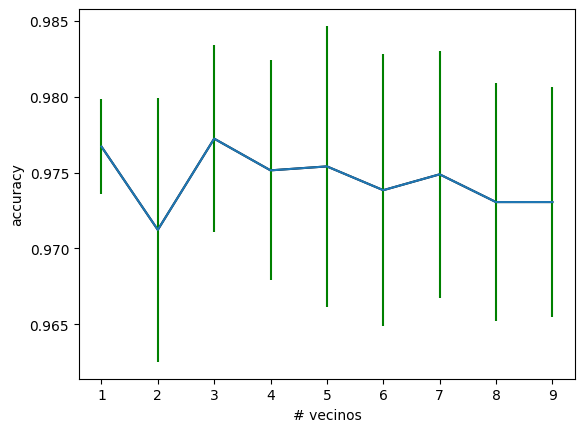

In [38]:
# Representamos la precisión obtenida, y la desviación típica de los resultados
scores = np.array (grid.cv_results_['mean_test_score'])
stdvalues = np.array (grid.cv_results_['std_test_score'])

plt.plot (nVecinos, scores, '-0')
plt.errorbar (nVecinos, scores, yerr = stdvalues, ecolor = 'g')

plt.xlabel ('# vecinos')
plt.ylabel ('accuracy')

plt.show()

Finalmente, elegimos el modelo con los mejores parámetros:

In [39]:
knn = grid.best_estimator_

Ajustaremos ahora el valor del parámetro de regularización C, y el tipo de kernel (también, en caso de elegir polinómico probaremos varios grados) a utilizar en la **SVM**:

In [40]:
# Ajustamos el valor del tipo de kernel y de C.
# Si elegimos polinómico, probamos con los grados 2,3 y 4

param_grid = [
  {'C': [0.1,1, 10, 100, 1000], 'kernel': ['linear', 'rbf']},
  {'C': [0.1,1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2,3,4]}
 ]

grid = GridSearchCV (svm, scoring = "accuracy", param_grid = param_grid, cv = 5)
grid.fit (X_train_reduced, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'kernel': ['linear', 'rbf']},
                         {'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [41]:
for params, results in zip(grid.cv_results_['params'], grid.cv_results_['mean_test_score']):
  print(f'{params} , Score = {results}')

print()
print()
print(f'Mejor modelo = {grid.best_params_}')

{'C': 0.1, 'kernel': 'linear'} , Score = 0.9775057317866065
{'C': 0.1, 'kernel': 'rbf'} , Score = 0.9701813639941141
{'C': 1, 'kernel': 'linear'} , Score = 0.9795989460356568
{'C': 1, 'kernel': 'rbf'} , Score = 0.986136946925367
{'C': 10, 'kernel': 'linear'} , Score = 0.9788132635253055
{'C': 10, 'kernel': 'rbf'} , Score = 0.9884898881018376
{'C': 100, 'kernel': 'linear'} , Score = 0.9788132635253055
{'C': 100, 'kernel': 'rbf'} , Score = 0.9884898881018376
{'C': 1000, 'kernel': 'linear'} , Score = 0.9788132635253055
{'C': 1000, 'kernel': 'rbf'} , Score = 0.9884898881018376
{'C': 0.1, 'degree': 2, 'kernel': 'poly'} , Score = 0.9505629127741848
{'C': 0.1, 'degree': 3, 'kernel': 'poly'} , Score = 0.9155100434589194
{'C': 0.1, 'degree': 4, 'kernel': 'poly'} , Score = 0.7148804024227493
{'C': 1, 'degree': 2, 'kernel': 'poly'} , Score = 0.982735516545187
{'C': 1, 'degree': 3, 'kernel': 'poly'} , Score = 0.9824737364404751
{'C': 1, 'degree': 4, 'kernel': 'poly'} , Score = 0.9589333743968792
{

In [42]:
svm = grid.best_estimator_

Finalmente, determinaremos el número de árboles, el número máximo de características para cada división del árbol y la profundidad máxima de nuestro **Random Forest**:

In [43]:
param_grid = {
    'n_estimators': [50,100,200],
    'max_features': ['sqrt', 'log2'],
    'max_depth':[None,3,7]
}

grid = GridSearchCV(rfc, param_grid, scoring = "accuracy", cv = 5)
grid.fit (X_train_reduced, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 3, 7],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [44]:
for params, results in zip(grid.cv_results_['params'], grid.cv_results_['mean_test_score']):
  print(f'{params} , Score = {results}')

print()
print()
print(f'Mejor modelo = {grid.best_params_}')

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 50} , Score = 0.9615498066591384
{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100} , Score = 0.9636426787119735
{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200} , Score = 0.9659973308695206
{'max_depth': None, 'max_features': 'log2', 'n_estimators': 50} , Score = 0.961549464462923
{'max_depth': None, 'max_features': 'log2', 'n_estimators': 100} , Score = 0.9691359545563426
{'max_depth': None, 'max_features': 'log2', 'n_estimators': 200} , Score = 0.9696591725695514
{'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 50} , Score = 0.8618889231085104
{'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 100} , Score = 0.8603192690688841
{'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 200} , Score = 0.8681658282859391
{'max_depth': 3, 'max_features': 'log2', 'n_estimators': 50} , Score = 0.869212606508572
{'max_depth': 3, 'max_features': 'log2', 'n_estimators': 100} , Score = 0.8741

In [45]:
rfc = grid.best_estimator_

La aplicación de PCA en el preprocesado ha permitido que se puedan ejecutar en un tiempo relativamente rápido estos procesos, gracias a la gran reducción de características que realizó.

### 6: Entrenamiento y estimación del error fuera de la muestra.



Ajustamos cada modelo con todo el conjunto de entrenamiento:

In [46]:
knn.fit(X_train_reduced, y_train)
svm.fit(X_train_reduced, y_train)
rfc.fit(X_train_reduced, y_train)

print("Todos los modelos ajustados")

Todos los modelos ajustados


Importamos los datos de test, y les aplicamos (sin ajustar de nuevo!) el preprocesado que aplicamos a los datos de entrenamiento:

In [47]:
csv_path = dataFolder + "optdigits.tes"
dataset_test = pd.read_csv(csv_path, header=None)

dataset_test = dataset_test.rename(columns={numFeatures:'Número'})
dataset_test_reduced = dataset_test.drop(columns = col07)

In [48]:
X_test = dataset_test_reduced.drop(columns=["Número"])
y_test = dataset_test_reduced["Número"]

X_test = scaler.transform(X_test)
X_test_reduced = pca.transform(X_test)

Realizamos por último la validación de los tres modelos, y mostramos los resultados en una tabla.

Calculamos el *f1-score*, y *accuracy* de cada modelo con el conjunto de test:

In [49]:
from sklearn.metrics import accuracy_score, f1_score

modelos = [knn,svm,rfc]
modelos_nombres = ["KNN","SVM","RandomForest"]

scores_training = []
scores_test = []

for modelo in modelos:
  scores = []

  # Predicción del modelo en los datos de training
  y_pred = modelo.predict(X_train_reduced)

  # accuracy y f1-score en training
  scores.append(accuracy_score(y_train, y_pred))
  scores.append(f1_score(y_train, y_pred, average='micro'))

  scores_training.append(scores)

  scores = []

  # Predicción del modelo en los datos de training
  y_pred = modelo.predict(X_test_reduced)

  # accuracy y f1-score en test
  scores.append(accuracy_score(y_test, y_pred))
  scores.append(f1_score(y_test, y_pred, average='micro'))

  scores_test.append(scores)

Representamos lo obtenido en una tabla:

In [50]:
from tabulate import tabulate

tabla = []
aux = 0

for modelo,nombre in zip(modelos,modelos_nombres):
  fila = []
  fila.append(nombre)

  fila.append(scores_training[aux][0])
  fila.append(scores_training[aux][1])

  fila.append(scores_test[aux][0])
  fila.append(scores_test[aux][1])

  aux += 1

  tabla.append(fila)

print(tabulate(tabla,
               headers=['Modelo', 'Accuracy (training)', 'F1-score (training)', 'Accuracy (test)', 'F1-score (test)'],
               tablefmt='fancy_grid',
               numalign='right'))

╒══════════════╤═══════════════════════╤═══════════════════════╤═══════════════════╤═══════════════════╕
│ Modelo       │   Accuracy (training) │   F1-score (training) │   Accuracy (test) │   F1-score (test) │
╞══════════════╪═══════════════════════╪═══════════════════════╪═══════════════════╪═══════════════════╡
│ KNN          │               0.99163 │               0.99163 │          0.970506 │          0.970506 │
├──────────────┼───────────────────────┼───────────────────────┼───────────────────┼───────────────────┤
│ SVM          │                     1 │                     1 │          0.978854 │          0.978854 │
├──────────────┼───────────────────────┼───────────────────────┼───────────────────┼───────────────────┤
│ RandomForest │                     1 │                     1 │          0.962159 │          0.962159 │
╘══════════════╧═══════════════════════╧═══════════════════════╧═══════════════════╧═══════════════════╛


Los tres modelos obtienen muy buenos resultados con más del 95% de acierto en la validación.

La máquina de vector soporte obtiene ligeramente un resultado mejor que los otros dos modelos, pero la diferencia entre los modelos es muy pequeña.

Observamos que tanto la SVM como el RandomForest se ajustan perfectamente a los datos de entrenamiento, lo que nos podría llevar a pensar que existe bastante sobreajuste, pero en la validación comprobamos que ambos modelos generalizan bastante bien.

El conjunto de datos que tenemos es bastante reducido, y podría ser por ello que la SVM obtiene un rendimiento ligeramente superior al RandomForest, que sería más adecuado con un conjunto mayor de datos/características. SVM con el kernel RBF gaussiano suele funcionar realmente bien si el conjunto de entrenamiento no es muy grande.

En cuanto al modelo de los k vecinos más cercanos, aun siendo un modelo mucho más simple que los otros dos, obtiene unos resultados muy similares a los otros dos, mostrando que es muy interesante su uso en este tipo de problemas.

Por último, es interesante comprobar qué valores confunden más nuestros modelos. Para ello, representaremos la matriz de confusión (que se define como $C_{ij} = $ número de observaciones de la clase $i$ que nuestro modelo ha etiquetado como perteneciente a la clase $j$).

In [51]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test_reduced)
cm = confusion_matrix(y_test, y_pred)

ind = list(range(0,10,1))
pd.DataFrame(cm, index=ind, columns=ind)

,0,1,2,3,4,5,6,7,8,9
0,178,0,0,0,0,0,0,0,0,0
1,0,182,0,0,0,0,0,0,0,0
2,0,6,171,0,0,0,0,0,0,0
3,0,0,2,178,0,0,0,0,3,0
4,0,1,0,0,178,0,0,0,2,0
5,0,0,0,1,1,179,0,0,0,1
6,0,0,0,0,0,0,181,0,0,0
7,0,0,0,0,0,0,0,171,1,7
8,0,10,0,2,0,2,0,0,158,2
9,0,0,1,5,0,2,0,0,4,168


Podemos observar que el modelo de kNN que hemos entrenado confunde un poco el 8 y el 2 con el 1, y el 7 con el 9.

In [52]:
y_pred = svm.predict(X_test_reduced)
cm = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm, index=ind, columns=ind)

,0,1,2,3,4,5,6,7,8,9
0,178,0,0,0,0,0,0,0,0,0
1,0,181,0,0,0,0,0,0,1,0
2,0,5,172,0,0,0,0,0,0,0
3,0,0,2,179,0,1,0,0,1,0
4,0,1,0,0,179,0,0,0,1,0
5,0,0,0,0,0,181,0,0,0,1
6,2,0,0,0,0,0,179,0,0,0
7,0,0,0,0,0,0,0,168,0,11
8,0,3,0,0,0,0,0,0,165,6
9,0,0,0,1,0,1,0,0,1,177


En este caso, la máquina de vector soporte apenas confunde números con el 1, pero sigue confundiendo bastante el 7 con el 9.

In [53]:
y_pred = rfc.predict(X_test_reduced)
cm = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm, index=ind, columns=ind)

,0,1,2,3,4,5,6,7,8,9
0,178,0,0,0,0,0,0,0,0,0
1,0,178,0,0,0,0,1,0,2,1
2,0,4,171,0,1,0,0,1,0,0
3,0,0,0,172,0,3,0,4,2,2
4,0,1,0,0,177,0,0,0,3,0
5,0,0,2,1,1,177,0,0,0,1
6,0,1,0,0,0,2,176,0,2,0
7,0,0,0,0,1,0,0,173,0,5
8,0,8,0,1,0,4,0,0,156,5
9,0,0,0,3,0,3,0,0,3,171


Los errores que comete el RandomForest son algo más uniformes, aunque sigue destacando que el 8 se confunde con el 1 y el 9 bastante.



---

## <font color='blue'> Ejercicio 3: PROBLEMA DE REGRESIÓN (4 puntos).

<font color='blue'> En este ejercicio los alumnos se enfrentarán a un problema de regresión, que tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). Más concretamente, se enfrentarán al problema $\textit{YearPredictionMSD}$ (https://archive.ics.uci.edu/dataset/203/yearpredictionmsd). Este conjunto de datos contiene información (características sonoras) de distintas canciones, y el objetivo es predecir el año de publicación de la canción (hay 89 posibles años a predecir). Cada fila/ejemplo contiene 90 valores reales y un valor entero, correspondiente con el año de la canción, en el rango $[1922, 2011]$). En total hay 515345 ejemplos/instancias. El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):
1. <font color='blue'> Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de, al menos, 3 modelos de aprendizaje automático a emplear en la resolución del problema, de los cuales 1 por lo menos debe ser un $ensemble$.
5. Selección y estimación de valores para hiperparámetros (incluyendo el tipo de regularización a usar).
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.


In [54]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### 1: Análisis de los datos

Los datos se han extraído de la base de datos
> Million Song Dataset

, una base de datos con datos de un millón de canciones populares. La extracción de dichos datos de realizó con la API:
> The Echo Nest

La utilidad que tenía dicha aplicación para la extracción de datos de las canciones provocó que Spotify la comprara en 2014.

Tenemos la siguiente información sobre los datos:
- 90 características relacionadas con el timbre de la canción y un año entre 1922 y 2011
- 515345 ejemplos
- No se tienen valores perdidos
- No existen canciones de un artista que estén tanto en el conjunto de entrenamiento como en el de test.

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [56]:
# np.loadtxt("drive/MyDrive/Colab Notebooks/regresion/YearPredictionMSD.txt",delimiter=",")

dataPath = "drive/MyDrive/Colab Notebooks/regresion/YearPredictionMSD.txt"

numFeatures = 90
years = [1922,2011]

features = list(range(0,numFeatures+1))
features[0] = 'year'

datos = pd.read_csv(dataPath, names=features)
datos.head()

,year,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.08960,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.72670,1.36790,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,73.04667,-37.36684,-3.13853,-24.21531,-13.23066,15.93809,-18.60478,82.15479,240.57980,-10.29407,31.58431,-25.38187,-3.90772,13.29258,41.55060,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.59110,-8.30657,7.93706,-10.73660,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.12450,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,2.21920,0.34006,44.38997,2056.93836,605.40696,457.41175,777.15347,415.64880,746.47775,366.45320,317.82946,273.07917,141.75921,317.35269,19.48271,-65.25496,162.75145,135.00765,-96.28436,-86.87955,17.38087,45.90742,32.49908,-32.85429,45.10830,26.84939,-302.57328,-41.71932,-138.85034,202.18689,-33.44277,195.04749,-16.93235,-1.09168,-25.38061,-12.19034,-125.94783,121.74212,136.67075,41.18157,28.55107,1.52298,70.99515,-43.63073,-42.55014,129.82848,79.95420,-87.14554,-45.75446,-65.82100,-43.90031,-19.45705,12.59163,-407.64130,42.91189,12.15850,-88.37882,42.25246,46.49209,-30.17747,45.98495,130.47892,13.88281,-4.00055,17.85965,-18.32138,-87.99109,14.37524,-22.70119,-58.81266,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,2.73553,0.82804,7.46586,699.54544,1016.00954,594.06748,355.73663,507.39931,387.69910,287.15347,112.37152,161.68928,144.14353,199.29693,-4.24359,-297.00587,-148.36392,-7.94726,-18.71630,12.77542,-25.37725,9.71410,0.13843,26.79723,6.30760,28.70107,-74.89005,-289.19553,-166.26089,13.09302,5.89085,6.89034,-10.97160,1.67565,11.43523,-7.27994,133.08169,141.86758,-56.99356,98.15952,18.50939,16.97216,24.26629,-10.50788,-8.68412,54.75759,194.74034,7.95966,-18.22685,0.06463,-2.63069,26.02561,1.75729,-262.36917,-233.60089,-2.50502,-12.14279,81.37617,2.07554,-1.82381,183.65292,22.64797,-39.98887,43.37381,-31.56737,-4.88840,-36.53213,-23.94662,-84.19275,66.00518,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,6.63016,-3.35142,37.64085,2174.08189,697.43346,459.24587,742.78961,229.30783,387.89697,249.06662,245.89870,176.20527,98.82222,150.97286,78.49057,-62.00282,43.49659,-96.42719,-108.96608,14.22854,14.54178,-23.55608,-39.36953,-43.59209,20.83714,35.63919,-181.34947,-93.66614,-90.55616,-0.01744,23.22717,-25.48348,-25.88070,12.59198,-24.85116,-7.20736,778.02248,61.15940,23.37585,-97.64925,4.56917,-37.32280,4.15159,12.24315,35.02697,-178.89573,82.46573,-20.49425,101.78577,-19.77808,-21.52657,3.36303,-11.63176,51.55411,-50.57576,-28.14755,-83.15795,-7.35260,-22.11505,1.18279,-122.70467,150.57360,24.37468,41.19821,-37.04318,-28.72986,162.19614,22.18309,-8.63509,85.23416,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,1.60923,2.19223,47.32082,894.28471,809.86615,318.78559,435.04497,341.61467,334.30734,322.99589,190.61921,235.84715,96.89517,210.58870,5.60463,-199.63958,204.85812,-77.17695,-65.79741,-6.95097,-12.15262,-3.85410,20

Se nos pide respetar la siguiente partición:
- Entrenamiento: primeros 463715 ejemplos
- Test: últimos 51630 ejemplos

In [57]:
dataset_train = datos.loc[:463714]
x_train = dataset_train.drop(columns=['year'])
y_train = dataset_train.year

dataset_test = datos.loc[463715:]
x_test = dataset_test.drop(columns=['year'])
y_test = dataset_test.year

Trabajaremos a partir de aquí únicamente con el conjunto de entrenamiento.

Lo primero de lo que se nos advierte es que, aunque los años van desde 1922 a 2011, hay un mayor número de datos de los años 2000s.

Observemos, realizando un histograma, si efectivamente es así:

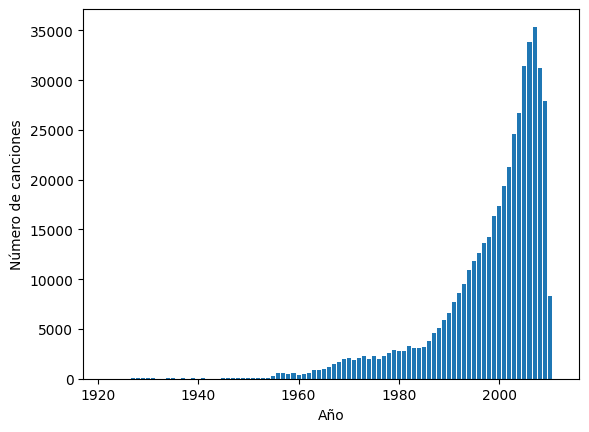

In [58]:
songs_per_year = []

for year in range(years[0],years[1]+1):
  songs_per_year.append(len(dataset_train[dataset_train['year']==year]))

plt.bar(range(years[0],years[1]+1), songs_per_year)
plt.xlabel("Año")
plt.ylabel("Número de canciones")

plt.show()

Efectivamente, existen muchos más ejemplos de los años 2000 a 2007, que del resto de años.

De hecho, si miramos los datos detenidamente en las colas, podemos comprobar que pasamos de tener entre 15000 y 30000 ejemplos a tener, como máximo 79 ejemplos.

In [59]:
for i in range(2000,2012):
  nsongs = len(dataset_train[dataset_train['year']==i])
  print(f'Número de canciones de {i}: {nsongs}')

print()

for i in range(1922,1934):
  nsongs = len(dataset_train[dataset_train['year']==i])
  print(f'Número de canciones de {i}: {nsongs}')

Número de canciones de 2000: 17354
Número de canciones de 2001: 19415
Número de canciones de 2002: 21291
Número de canciones de 2003: 24574
Número de canciones de 2004: 26680
Número de canciones de 2005: 31454
Número de canciones de 2006: 33824
Número de canciones de 2007: 35375
Número de canciones de 2008: 31244
Número de canciones de 2009: 27907
Número de canciones de 2010: 8363
Número de canciones de 2011: 1

Número de canciones de 1922: 6
Número de canciones de 1923: 0
Número de canciones de 1924: 5
Número de canciones de 1925: 7
Número de canciones de 1926: 19
Número de canciones de 1927: 40
Número de canciones de 1928: 48
Número de canciones de 1929: 79
Número de canciones de 1930: 38
Número de canciones de 1931: 31
Número de canciones de 1932: 11
Número de canciones de 1933: 6


Es necesario tener cierto cuidado, ya que nuestro modelo podría tender a clasificar todas las canciones en el intervalo [2000,2010], por ser los ejemplos de estas épocas mayoritarios.

Sería ahora interesante comprobar entre qué valores oscilan las características que nos han proporcionado.

In [60]:
pd.set_option('display.max_columns', None)
x_train.describe().loc[['min','max']]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
min,1.74900,-337.09250,-301.00506,-154.18358,-181.95337,-81.79429,-188.21400,-72.50385,-126.47904,-41.63166,-69.68087,-94.04196,0.13283,8.47420,21.21435,17.85790,12.15042,5.51771,19.80881,6.25487,6.18376,15.30750,6.11644,5.17734,-2821.43021,-13374.75738,-12017.08887,-4324.86470,-3357.27990,-3115.37456,-3805.66617,-1516.35644,-1679.11832,-1590.63713,-989.64580,-1711.48400,-8448.19488,-10095.72595,-9803.75904,-7882.82324,-4673.35538,-4175.41268,-4975.38177,-1072.95552,-1021.28921,-1329.95974,-14861.69535,-3992.68866,-6642.39958,-2344.52650,-2270.81107,-1746.47822,-3188.17738,-2199.78221,-1694.26032,-4536.69953,-5111.60175,-4730.59910,-3017.92525,-2499.95468,-1900.10480,-1129.51344,-583.20098,-10345.83328,-7375.97744,-3896.27522,-1199.00442,-2564.78812,-1904.98432,-930.32622,-7057.71245,-6953.35736,-8400.60330,-1812.88944,-1387.50549,-718.42105,-9831.45386,-2019.43141,-8390.03545,-4754.93717,-437.72203,-4402.37644,-1810.68919,-3098.35031,-341.78912,-3168.92457,-4319.99232,-236.03926,-7458.37815,-318.22333
max,61.97014,384.06573,322.85143,289.52743,262.06887,119.81559,172.40268,105.21028,146.29795,60.34535,30.83355,87.91324,549.76491,65735.77953,36816.79037,31849.48676,19865.93197,16831.94903,10667.72883,9569.77809,9616.61560,3721.87321,6737.12150,9813.23367,2049.60434,24479.66465,14505.34222,3410.61556,3277.63367,3553.18488,1828.02840,1954.35548,2887.84621,2330.33366,1813.23653,2496.12262,14148.99785,8059.14646,6065.05481,8360.14557,3537.50359,3892.12478,1202.49154,1830.54468,746.70750,1198.62677,9059.75981,5819.49466,4126.70404,2021.69779,1426.84804,2460.43343,2394.66234,2900.52018,569.13581,6955.41472,8889.24993,13001.25902,5419.27694,5690.29165,1811.22866,973.05298,812.42425,11048.19818,2877.73853,3447.47902,2055.03948,4779.80027,5286.82163,745.50339,3958.07011,4741.18100,2124.10093,1639.93044,1278.33332,741.02902,10020.28316,3423.59535,4723.48192,3735.02558,840.97338,4469.45487,3210.70170,1672.64710,260.54490,3662.06565,2833.60895,463.41950,7393.39844,600.76624


Veámoslos en una gráfica.

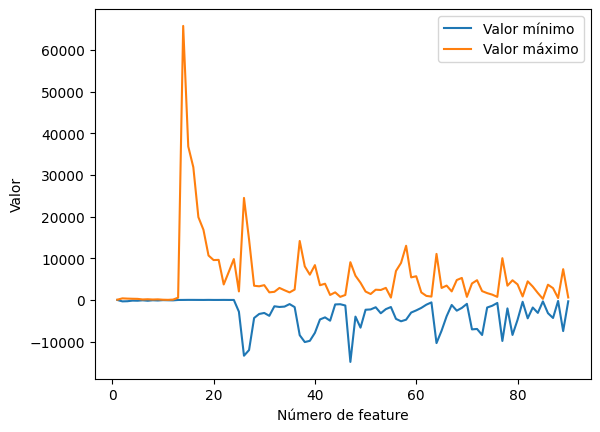

In [61]:
plt.plot(range(1,numFeatures+1),x_train.describe().loc['min'], label='Valor mínimo')
plt.plot(range(1,numFeatures+1),x_train.describe().loc['max'], label='Valor máximo')

ax = plt.gca()
ax.set_xlabel("Número de feature")
ax.set_ylabel("Valor")
ax.legend()

plt.show()

Ya podemos comprobar que este problema difiere mucho del anterior, en el que todas las características oscilaban en un dominio muy reducido.

La distancia entre el máximo y mínimo de cada característica va a ser muy grande En este caso, el escalado será muy necesario, para los algoritmos afectados por las escalas.

 Destaca, por ejemplo, la característica 14, donde la diferencia entre el máximo y el mínimo es de más de 60 mil unidades.

Finalmente, antes de iniciar el procesado, podemos realizar un gráfico de varias canciones del conjunto de entrenamiento.

Representaremos 10 canciones de cada década:

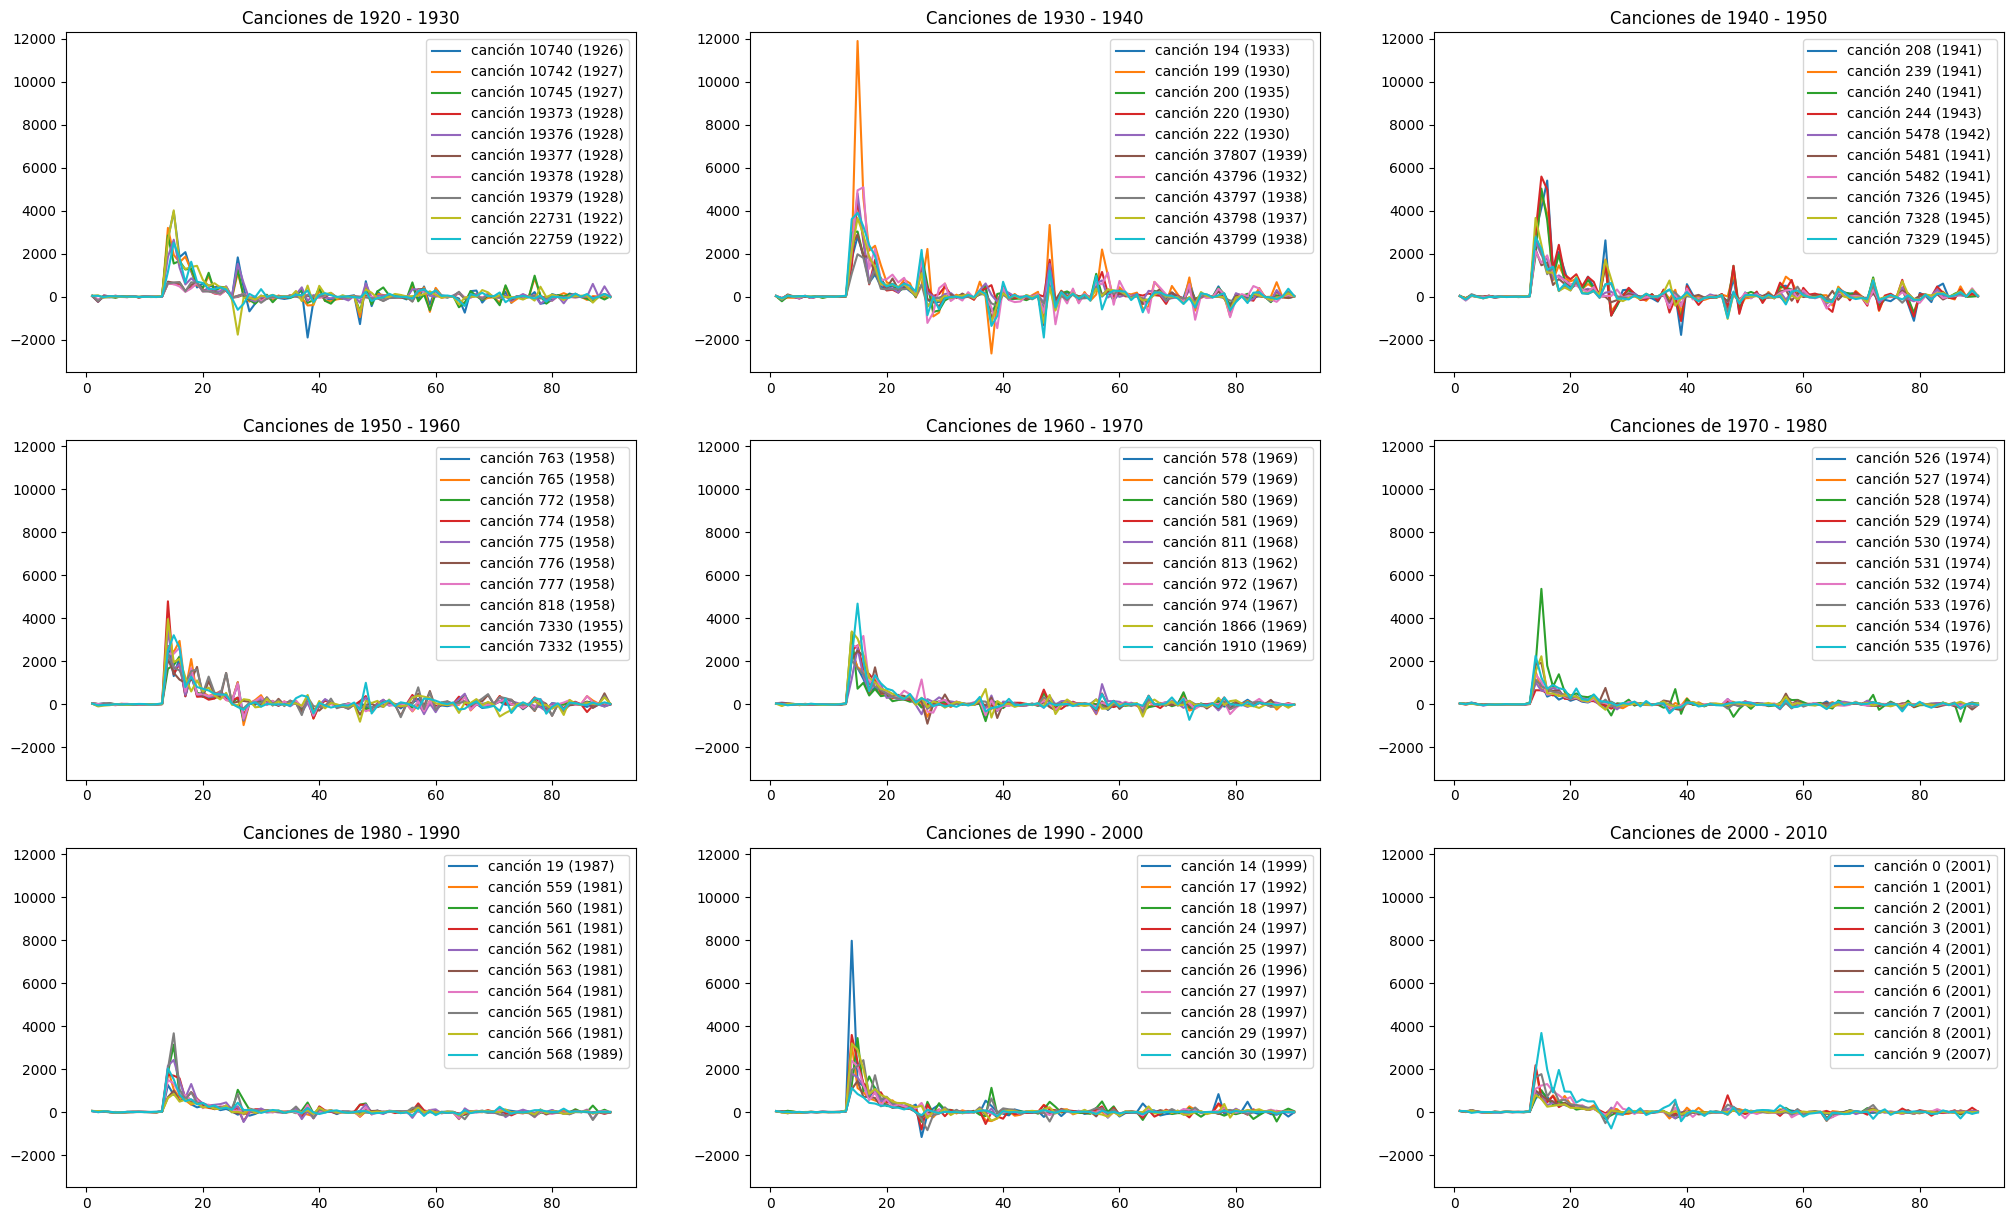

In [62]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25, 15))

numCancionesDecada = 10

for k in range(1,10):

  # Canciones de la decada [1920+(k-1)*10 - 1920+k*10)
  vals = dataset_train[dataset_train.year < 1920+k*10]
  vals = vals[vals.year >= (1920+(k-1)*10)].iloc[:numCancionesDecada]

  yearsValues = vals['year']
  vals = vals.drop(columns=['year'])

  ax = plt.subplot(3, 3, k)
  ax.set_ylim([-3500, 12300])

  for j in range(0,numCancionesDecada):
    ax.plot(range(1,91),vals.iloc[j], label=f'canción {vals.index[j]} ({yearsValues.iloc[j]})')

  ax.legend()
  ax.set_title(f'Canciones de {1920+(k-1)*10} - {1920+k*10}')


A primera vista, lo que más destaca es que hay algunas décadas en las que las características varían mucho (como entre 1930 y 1940), y otras (como del 2000 al 2010) en las que apenas varían.

Sin embargo, a simple vista parece muy complicado distinguir una canción de una época de una canción de otra época, especialmente si son de décadas contiguas.

### 2: Preprocesado de datos

Nuestro objetivo principal será reducir el número de características. Para ello, aplicaremos, tras un escalado, PCA:

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

x_train

array([[ 1.07878578,  0.3915658 ,  1.82696245, ..., -0.47047696,
        -0.25536649,  0.04263679],
       [ 0.87951065,  0.33263074,  1.74896068, ...,  0.57086074,
         0.20934068,  1.16111783],
       [ 1.24551515,  0.59277085,  1.33754998, ..., -0.33808131,
         0.10782848, -0.09012209],
       ...,
       [ 0.16295616,  0.00705667,  0.83696599, ..., -0.66394994,
         0.01455343, -0.24641243],
       [ 0.2470323 ,  0.24967363, -0.40712469, ...,  0.53492495,
         0.46999692,  0.7024367 ],
       [ 1.14103808,  0.10560857,  1.28757254, ..., -0.05011829,
        -0.33914232, -0.05763319]])

Representamos en una gráfica cómo queda el dominio de cada característica tras el escalado:

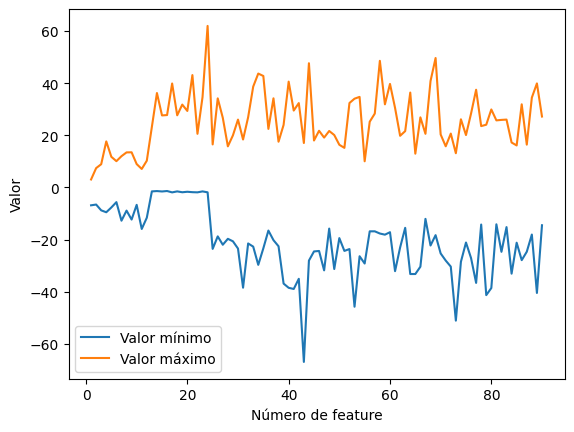

In [64]:
plt.plot(range(1,numFeatures+1),np.min(x_train, axis=0), label='Valor mínimo')
plt.plot(range(1,numFeatures+1),np.max(x_train, axis=0), label='Valor máximo')

ax = plt.gca()
ax.set_xlabel("Número de feature")
ax.set_ylabel("Valor")
ax.legend()

plt.show()

Aplicamos ahora una PCA para reducir dimensionalidad:

In [65]:
pca = PCA(n_components=0.95)
pca.fit(x_train)
x_train_reduced = pca.transform(x_train)

print(f'Número anterior de features = {len(x_train[0])}')
print(f'Número de features tras PCA = {len(x_train_reduced[0])}')

Número anterior de features = 90
Número de features tras PCA = 67


A diferencia del caso anterior, parece que en este dataset la mayoría de características aportan mucha varianza, y únicamente se puede eliminar un número muy reducido de ellas.

### 3: Definición del protocolo de validación experimental

El proceso será análogo al del ejercicio anterior.

Utilizaremos para el entrenamiento el conjunto de entrenamiento del que disponemos, ya escalado, y reducido gracias al PCA.

Para conseguir ajustar los hiperparámetros de cada modelo, utilizaremos los datos de entrenamiento de los que disponemos utilizando Grid Search y Cross Validation.

Finalmente, tras haber ajustado todos los hiperparámetros, probraremos cada modelo obtenido con el dataset de test, que aun no hemos mirado (para evitar el data snooping), para comprobar qué modelo es el mejor.

Durante este ejercicio, utilizaremos tres métricas asociadas a los problemas de regresión: el error absoluto medio ($MAE$), el error cuadrático medio ($MSE$, y su raíz cuadrada positiva, $RMSE$), y el coeficiente de determinación ($R^2$).

Para ajustar los parámetros via GridSearch, utilizaremos el $MSE$, castigando de esta forma que nuestro modelo se equivoque en algunas predicciones en gran cantidad, aunque en el resto apenas se equivoque.

### 4: Selección de 3 modelos de aprendizaje automático

Utilizaremos primeramente el modelo más sencillo, una regresión lineal:

In [66]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

Después utilizaremos un modelo lineal ajustado ajustado utilizando el descenso de gradiente estocástico (utilizando regularización).

Se ha tomado la decisión de utilizar este modelo debido al gran tamaño del dataset por lo dicho en la [documentación de ScikitLearn](https://scikit-learn.org/stable/modules/sgd.html#regression).

In [67]:
from sklearn.linear_model import SGDRegressor

sgdlasso = SGDRegressor(random_state=43,penalty='l1')
sgdridge = SGDRegressor(random_state=43,penalty='l2')

Finalmente, como modelo ensemble, utilizaremos HistGradientBoostingRegressor (basado en histogramas, optimizado para grandes conjuntos de datos), como modelo ensemble de árboles de decisión, ajustado utilizando Gradient Boosting:

In [68]:
from sklearn.ensemble import HistGradientBoostingRegressor

gradientBoost = HistGradientBoostingRegressor(random_state=43, max_iter=6000)

### 5: Selección y estimación de valores para hiperparámetros

**SGD LASSO**
Ajustaremos el valor del parámetro $\alpha$:

In [69]:
# Tiempo de ejecución: 3 minutos

from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [1e-4,1e-3,1e-2]}
grid = GridSearchCV (sgdlasso, scoring = "neg_mean_squared_error", param_grid = param_grid, cv = 5)
grid.fit (x_train_reduced, y_train)

grid.best_params_

{'alpha': 0.01}

In [70]:
for params, results in zip(grid.cv_results_['params'], grid.cv_results_['mean_test_score']):
  print(f'{params} , Score = {results}')

print()
print()
print(f'Mejor modelo = {grid.best_params_}')

{'alpha': 0.0001} , Score = -98.62224966972602
{'alpha': 0.001} , Score = -98.6228909740195
{'alpha': 0.01} , Score = -98.61797653580109


Mejor modelo = {'alpha': 0.01}


In [71]:
sgdlasso = grid.best_estimator_

**SGD RIDGE**
Ajustaremos el valor del parámetro $\alpha$:

In [72]:
# Tiempo estimado: 2 minutos

from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [1e-4,1e-3,1e-2]}
grid = GridSearchCV (sgdridge, scoring = "neg_mean_squared_error", param_grid = param_grid, cv = 5)
grid.fit (x_train_reduced, y_train)

GridSearchCV(cv=5, estimator=SGDRegressor(random_state=43),
             param_grid={'alpha': [0.0001, 0.001, 0.01]},
             scoring='neg_mean_squared_error')

In [73]:
for params, results in zip(grid.cv_results_['params'], grid.cv_results_['mean_test_score']):
  print(f'{params} , Score = {results}')

print()
print()
print(f'Mejor modelo = {grid.best_params_}')

{'alpha': 0.0001} , Score = -98.79605253104792
{'alpha': 0.001} , Score = -98.79500089007915
{'alpha': 0.01} , Score = -98.78936934942071


Mejor modelo = {'alpha': 0.01}


In [74]:
sgdridge = grid.best_estimator_

**Gradient Boosting**
Ajustaremos el valor del parámetro *max_iter*, es decir, el máximo número de árboles.

También sería interesante variar el parámetro *loss* entre 'absolute_error' y 'squared_error'. Sin embargo, parece claro que utilizaremos uno u otro dependiendo del valor (error absoluto medio, o MSE) que queramos optimizar.

In [75]:
# Tiempo estimado: 8 minutos

from sklearn.model_selection import GridSearchCV

param_grid = {'max_iter': [10, 100,1000]}
grid = GridSearchCV (gradientBoost, scoring = "neg_mean_squared_error", param_grid = param_grid, cv = 3, n_jobs=-1)
grid.fit (x_train_reduced, y_train)

GridSearchCV(cv=3,
             estimator=HistGradientBoostingRegressor(max_iter=6000,
                                                     random_state=43),
             n_jobs=-1, param_grid={'max_iter': [10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [76]:
for params, results in zip(grid.cv_results_['params'], grid.cv_results_['mean_test_score']):
  print(f'{params} , Score = {results}')

print()
print()
print(f'Mejor modelo = {grid.best_params_}')

{'max_iter': 10} , Score = -106.49099977722479
{'max_iter': 100} , Score = -90.00974282128173
{'max_iter': 1000} , Score = -86.89175920656776


Mejor modelo = {'max_iter': 1000}


In [77]:
gradientBoost = grid.best_estimator_

En principio, por lo obtenido por validación cruzada, nuestro mejor modelo será este último, ya que es el que obtiene el menor error cuadrático.

### 6: Entrenamiento y estimación del error fuera de la muestra.



#### Entrenamiento de los modelos

In [78]:
lr.fit(x_train_reduced, y_train)

LinearRegression()

In [79]:
sgdlasso.fit(x_train_reduced, y_train)

SGDRegressor(alpha=0.01, penalty='l1', random_state=43)

In [80]:
sgdridge.fit(x_train_reduced, y_train)

SGDRegressor(alpha=0.01, random_state=43)

In [81]:
gradientBoost.fit(x_train_reduced, y_train)

HistGradientBoostingRegressor(max_iter=1000, random_state=43)

#### Error fuera de la muestra

Escalamos y reducimos con PCA, utilizando los ajustes ya realizados en el conjunto de entrenamiento, el conjunto de test:

In [82]:
x_test_reduced = scaler.transform(x_test)
x_test_reduced = pca.transform(x_test_reduced)

Calculamos el error de cada modelo:

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

modelos = [lr,sgdlasso, sgdridge, gradientBoost]
modelos_nombres = ["Regresión Lineal","SGD (Lasso)","SGD (Ridge)", "Gradient Boosting"]

scores_training = []
scores_test = []

for modelo in modelos:
  scores = []

  # Predicción del año de las canciones de training
  y_pred = modelo.predict(x_train_reduced)

  # MAE, RMSE y R^2 de training
  scores.append(mean_absolute_error(y_train, y_pred))
  scores.append(np.sqrt(mean_squared_error(y_train, y_pred)))
  scores.append(r2_score(y_train, y_pred))

  scores_training.append(scores)

  scores = []

  # Predicción del año de las canciones de test
  y_pred = modelo.predict(x_test_reduced)

  # MAE, RMSE y R^2 de test
  scores.append(mean_absolute_error(y_test, y_pred))
  scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
  scores.append(r2_score(y_test, y_pred))

  scores_test.append(scores)



Mostramos los resultados en una tabla:

In [84]:
from tabulate import tabulate

tabla = []
aux = 0

for modelo,nombre in zip(modelos,modelos_nombres):
  fila = []
  fila.append(nombre)

  # MAE training y test
  fila.append(scores_training[aux][0])
  fila.append(scores_test[aux][0])

  # RMSE training y test
  fila.append(scores_training[aux][1])
  fila.append(scores_test[aux][1])

  # R^2 training y test
  fila.append(scores_training[aux][2])
  fila.append(scores_test[aux][2])

  aux += 1

  tabla.append(fila)

print(tabulate(tabla,
               headers=['Modelo', 'Error absoluto medio (training)', 'Error absoluto medio (test)', 'RMSE (train)', 'RMSE (test)', 'R2(training)', 'R2(test)'],
               tablefmt='fancy_grid',
               numalign='right'))

╒═══════════════════╤═══════════════════════════════════╤═══════════════════════════════╤════════════════╤═══════════════╤════════════════╤════════════╕
│ Modelo            │   Error absoluto medio (training) │   Error absoluto medio (test) │   RMSE (train) │   RMSE (test) │   R2(training) │   R2(test) │
╞═══════════════════╪═══════════════════════════════════╪═══════════════════════════════╪════════════════╪═══════════════╪════════════════╪════════════╡
│ Regresión Lineal  │                            7.1957 │                       7.18474 │        9.88537 │       9.85128 │       0.183473 │   0.175913 │
├───────────────────┼───────────────────────────────────┼───────────────────────────────┼────────────────┼───────────────┼────────────────┼────────────┤
│ SGD (Lasso)       │                           7.23177 │                       7.22416 │         9.9284 │       9.89705 │       0.176349 │   0.168238 │
├───────────────────┼───────────────────────────────────┼─────────────────────────

#### Análisis. ¿Hemos conseguido modelos realmente buenos?

En este caso, está claro que el modelo ensemble de árboles de decisión con Gradient Boosting es el mejor modelo de los 3. Obtiene el menor error absoluto medio y el menor error cuadrático medio. Además, es el único que consigue llegar a explicar más del 25% de la variabilidad de los ejemplos del test.

Al ser datos tabulares (y además, en una gran cantidad), estos modelos suelen tener los mejores resultados, superando en la mayor parte de las veces incluso a las redes neuronales.

Los dos modelos lineales, ajustados utilizando el descenso de gradiente estocástico, obtienen prácticamente el mismo resultado, con un ligero mejor resultado de la regularización Lasso ($L_1$). En general, en problemas de alta dimensionalidad suele ser la mejor opción porque la solución que proporciona es dispersa.

El modelo de regresión lineal, el más simple de los cuatro, obtiene un resultado ligeramente peor que los anteriores.

Todos los modelos obtienen un valor de $R^2$ muy reducido, es decir, explican muy poca variabilidad de los ejemplos del test. Además, aunque el error absoluto medio es muy reducido en los 4 modelos, el error cuadrático medio es, incluso en el mejor de los casos, cercano a 100.

Este error, castiga en gran medida, los errores elevados en algunas predicciones, aunque no sean muchos.

Veamos por qué está ocurriendo esto. Para ello, comprobaremos cuánto nos equivocamos de media en cada ejemplo del test, nuestro mejor modelo:  

In [85]:
y_pred = gradientBoost.predict(x_test_reduced)

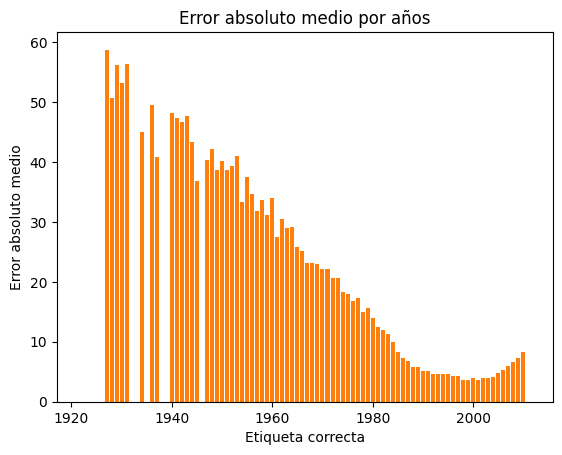

In [86]:
errores = []

for i in range(years[0],years[1]+1):
  errores.append([])

# Añadimos el error cometido, al correspondiente de la entrada de ese año
for i in range(len(x_test)):
  errores[y_test.iloc[i] - years[0]].append(abs(y_pred[i]-y_test.iloc[i]))

medias = []

# Calculamos la media
for arr in errores:
  if(len(arr) > 0):
    medias.append(np.mean(arr))
  else:
    medias.append(0)

# Mostramos
plt.bar(range(years[0],years[1]+1), medias, color='C1')
plt.title("Error absoluto medio por años")

ax = plt.gca
plt.xlabel('Etiqueta correcta')
plt.ylabel('Error absoluto medio')

plt.show()

Y comprobamos ya lo que está ocurriendo. Nuestro modelo clasifica muy bien los ejemplos cercanos a los años 2000, pero antes de los 60s el modelo falla mucho, de hecho en los primeros ejemplos tiene un error de más de 60 años de media.

EL problema del desbalance de los datos, como advertimos en un principio se manifiesta en el resultado. Sin embargo, lo que provoca que nuestros resultados sigan pareciendo buenos es que la distribución de los datos de test es tan desbalanceada como la de los datos de entrenamiento:

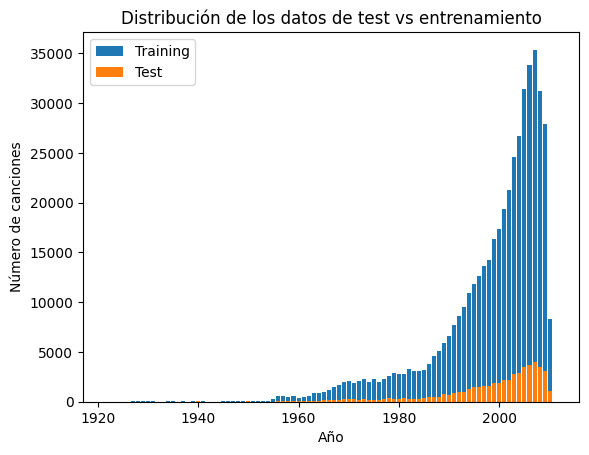

In [87]:
songs_per_year_test = []
songs_per_year_train = []

for year in range(years[0],years[1]+1):
  songs_per_year_test.append(len(dataset_test[dataset_test['year']==year]))
  songs_per_year_train.append(len(dataset_train[dataset_train['year']==year]))

plt.bar(range(years[0],years[1]+1), songs_per_year_train, label="Training")
plt.bar(range(years[0],years[1]+1), songs_per_year_test, color='C1', label="Test")

plt.xlabel("Año")
plt.ylabel("Número de canciones")

plt.title("Distribución de los datos de test vs entrenamiento")
plt.legend()

plt.show()

Por último, resulta sorprendente que la distribución tan desbalanceda de los datos, tanto de entrenamiento como de test, provoca que una simple predicción constante, donde siempre predecimos el año de lanzamiento medio del conjunto de entrenamiento, obtenga resultados similares a los nuestros:

In [88]:
average_year = np.mean(y_train)

tabla.clear()

y_predict_train = np.zeros(y_train.shape) + average_year
y_predict_test = np.zeros(y_test.shape) + average_year

fila = []
fila.append("Predicción constante")

fila.append(mean_absolute_error(y_train,y_predict_train))
fila.append(mean_absolute_error(y_test,y_predict_test))

fila.append(np.sqrt(mean_squared_error(y_train,y_predict_train)))
fila.append(np.sqrt(mean_squared_error(y_test,y_predict_test)))

fila.append(r2_score(y_train,y_predict_train))
fila.append(r2_score(y_test,y_predict_test))

tabla.append(fila)

print(tabulate(tabla,
               headers=['Modelo', 'Error absoluto medio (training)', 'Error absoluto medio (test)', 'RMSE (train)', 'RMSE (test)', 'R2(training)', 'R2(test)'],
               tablefmt='fancy_grid',
               numalign='right'))

╒══════════════════════╤═══════════════════════════════════╤═══════════════════════════════╤════════════════╤═══════════════╤════════════════╤═════════════╕
│ Modelo               │   Error absoluto medio (training) │   Error absoluto medio (test) │   RMSE (train) │   RMSE (test) │   R2(training) │    R2(test) │
╞══════════════════════╪═══════════════════════════════════╪═══════════════════════════════╪════════════════╪═══════════════╪════════════════╪═════════════╡
│ Predicción constante │                           8.16409 │                       8.11307 │        10.9398 │       10.8525 │              0 │ -0.00010212 │
╘══════════════════════╧═══════════════════════════════════╧═══════════════════════════════╧════════════════╧═══════════════╧════════════════╧═════════════╛


En general, comprobamos que nuestros modelos han sobreaprendido el hecho de que casi todas las canciones son de los años 2000. Además, el conjunto de test les permite obtener buenos resultados, debido a que en este último casi todas las canciones vuelven a ser de estos años.

Sin embargo, en casi todas las canciones que realmente son de los años 20, 30 o 40 el algoritmo falla en gran medida.